# Контест 2 - хэш-функции

### Задача A-Полиномиальная хеш-функция
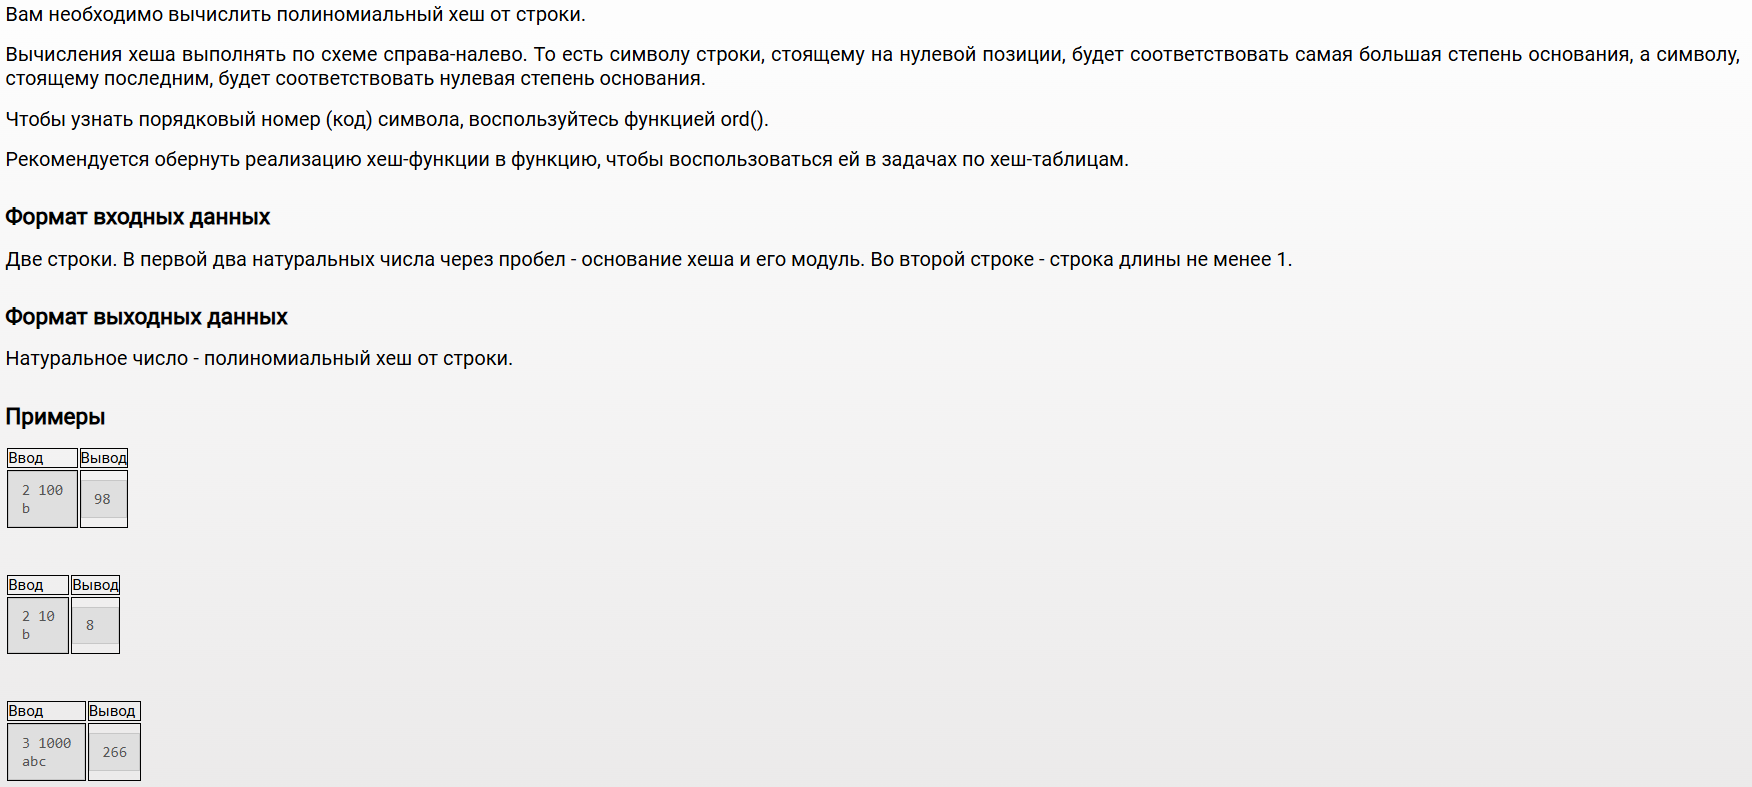

In [ ]:
base, module = list(map(int, input().split()))
s = input()
polynom = 0
for i in range(len(s)):
    polynom += ord(s[i])*base**(len(s)-i-1)
hash = polynom % module
print(hash)

### Задача B-Ассоциативный массив на хеш-таблице с цепочками - Добавление элемента
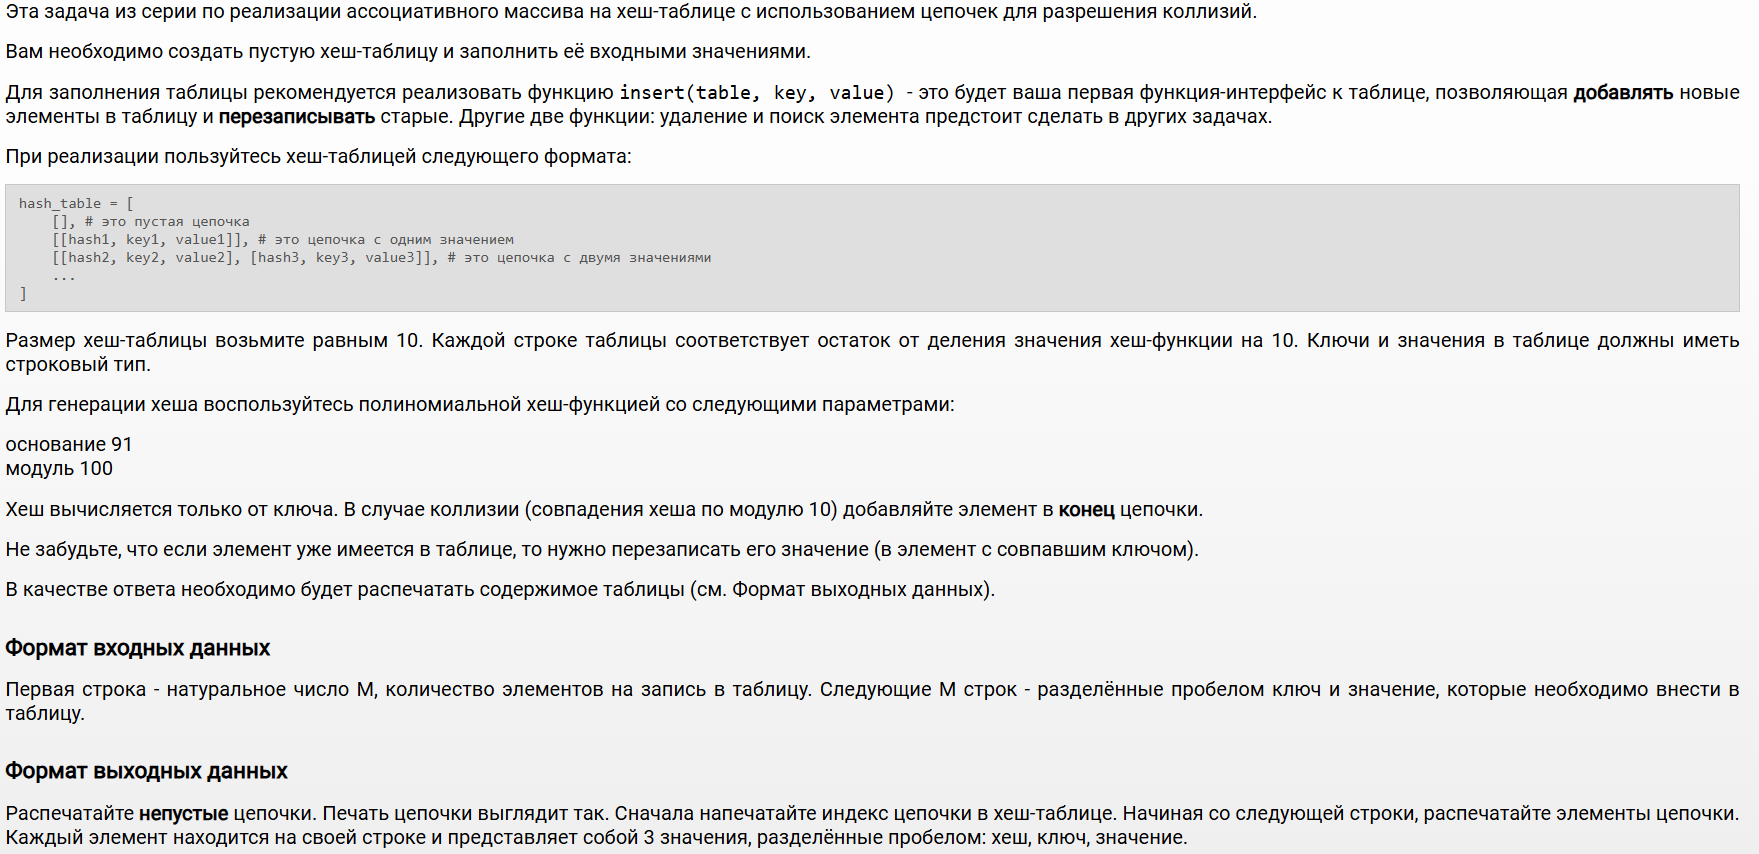
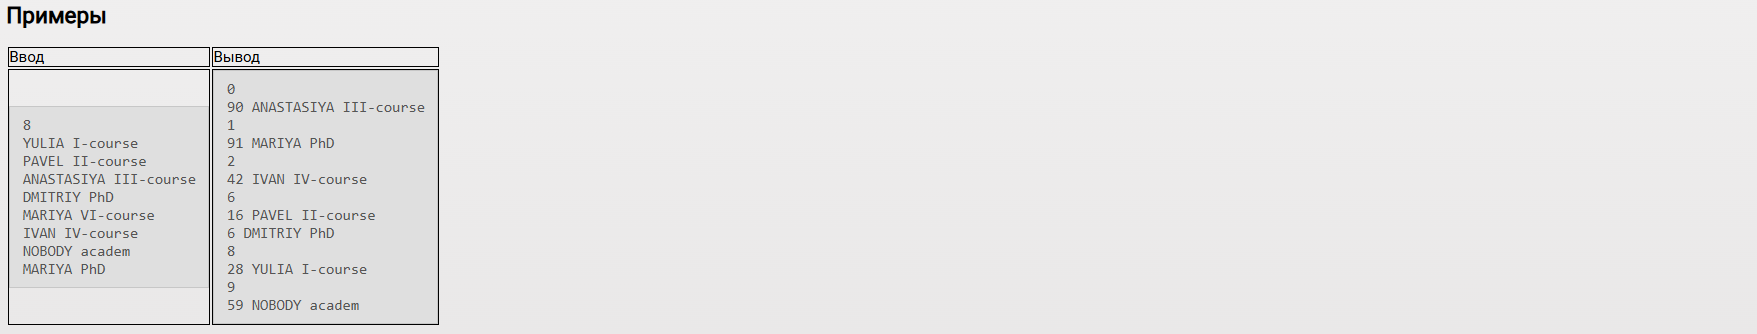

In [ ]:
m = int(input())
hash_table = [[] for _ in range(10)]

def polynom_hash(base, module, s):
    polynom = 0
    for i in range(len(s)):
        polynom += ord(s[i])*base**(len(s)-i-1)
    hash = polynom % module
    return hash

def insert(key, value):
    h = polynom_hash(91, 100, key)
    n = h % 10
    flag = 0
    
    if len(hash_table[n]) != 0:
        for i in range(0, len(hash_table[n])):
            if hash_table[n][i][1] == key:
                hash_table[n][i][2] = value
                flag = 1
    if flag == 0:
        hash_table[n].append([h, key, value])
    return

for i in range(m):
    key, value = input().split()
    insert(key, value)

for i in range(10):
    if hash_table[i] != []:
        print(i)
        for j in range(len(hash_table[i])):
            print(*hash_table[i][j])

### Задача C-Ассоциативный массив на хеш-таблице с цепочками - Поиск элемента
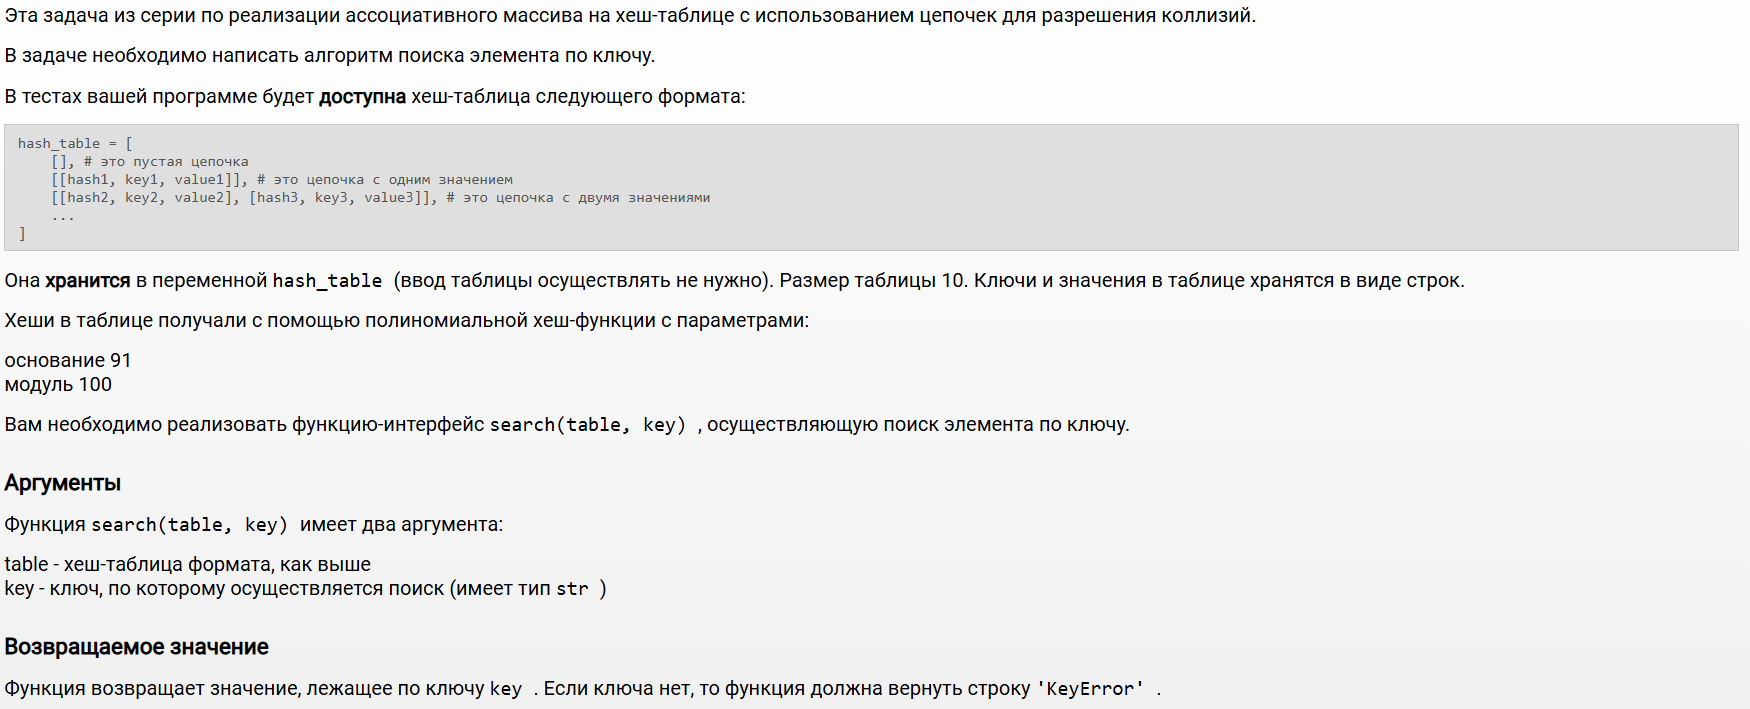

In [76]:
def polynom_hash(base, module, s):
    polynom = 0
    for i in range(len(s)):
        polynom += ord(s[i])*base**(len(s)-i-1)
    hash = polynom % module
    return hash
    
def search(table, key):
    hash_value = polynom_hash(91, 100, key) % 10
    for i in table[hash_value]:
        if i[1] == key:
            return i[2]
    return 'KeyError'

### Задача D-Хеш-таблица с цепочками - Удаление элемента
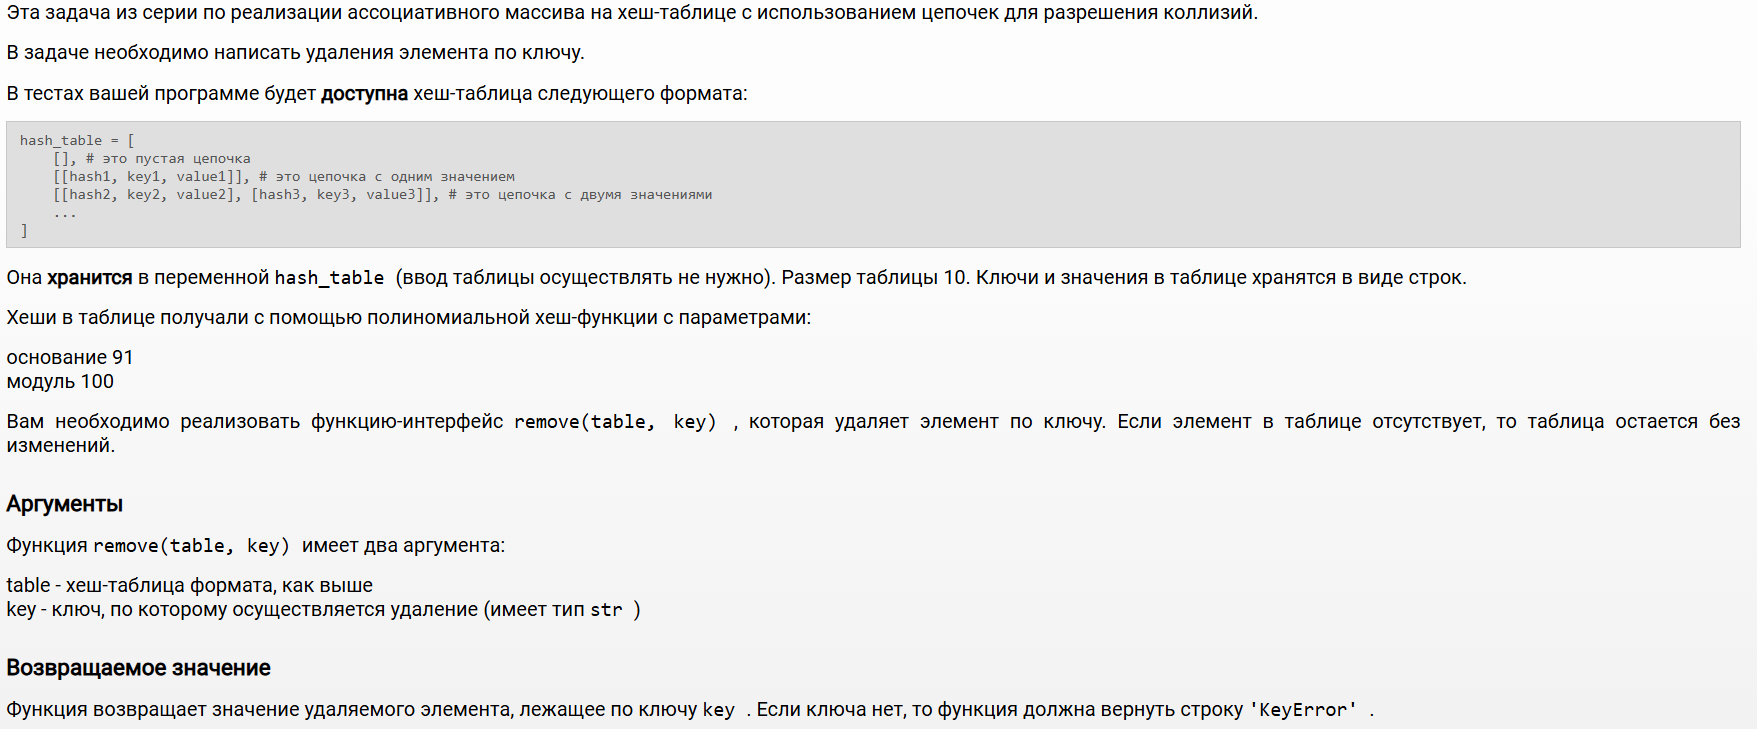

In [77]:
def polynom_hash(base, module, s):
    polynom = 0
    for i in range(len(s)):
        polynom += ord(s[i])*base**(len(s)-i-1)
    hash = polynom % module
    return hash
    
def remove(table, key):
    hash_value = polynom_hash(91, 100, key) % 10
    for i in range(len(table[hash_value])):
        if table[hash_value][i][1] == key:
            k = table[hash_value][i][2]
            table[hash_value].pop(i)
            return k
    return 'KeyError'

### Задача E-Алгоритм Рабина-Карпа
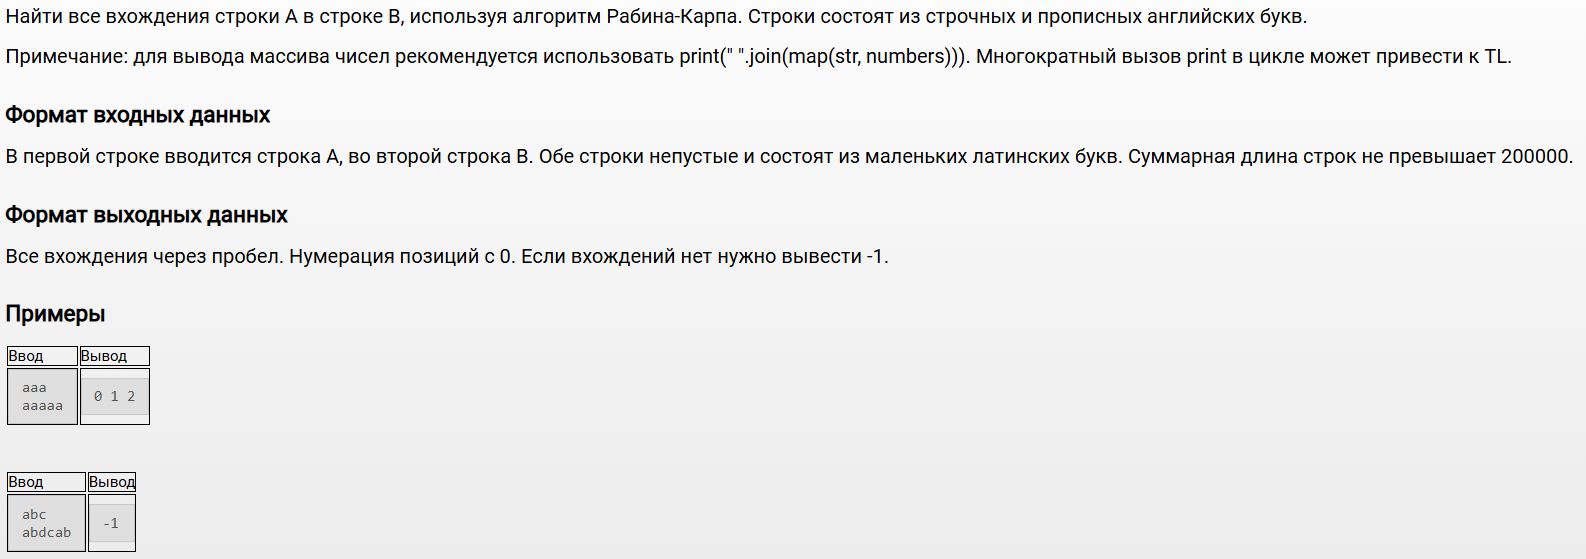

In [ ]:
def code(symbol):
    code = ord(symbol) - ord('a') + 1
    return code


def polynom_hash(string):
    values = [0]
    for elem in string:
        values.append(((values[-1]*base) + code(elem)) % mod)
    return values

base = 91
mod = 10000007

A = input()
B = input()
hash_A = polynom_hash(A)[-1]
hash_B = polynom_hash(B)
indexes = []
tmp = base**len(A) % mod

for i in range(0, -len(A) + len(B) + 1):
    if (hash_A == (hash_B[i + len(A)] - hash_B[i]*tmp) % mod):
        indexes.append(i)
        
if indexes:
    print(" ".join(map(str, indexes)))
else:
    print(-1)

# Контест 3 Стэк, очередь, куча

### A-Покер Чапаева
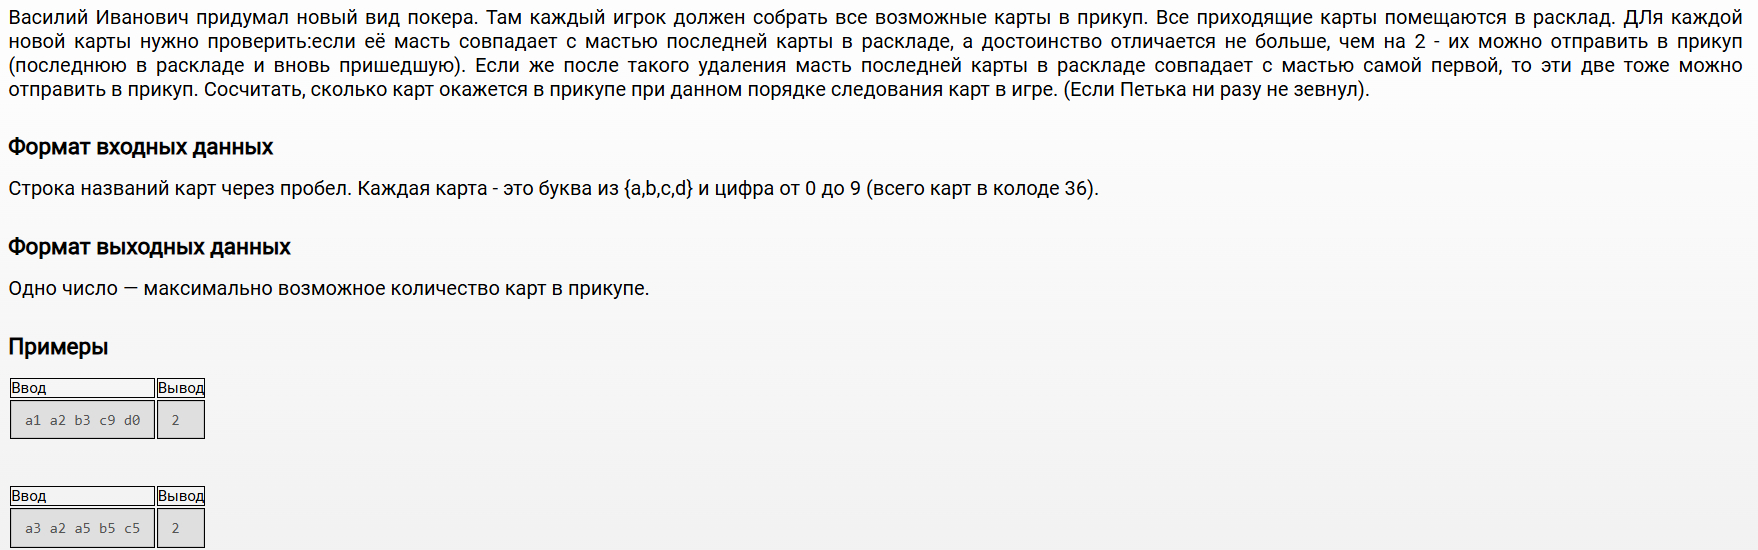

In [ ]:
from collections import deque
cards = input().split()
d = deque()
count = 0
d.append(cards[0])

for i in range(1, len(cards)):
    
    if len(d) < 2:
        d.append(cards[i])
        continue
        
    elif d[len(d)-1][0] == d[len(d)-2][0] and abs(int(d[len(d)-1][1]) - int(d[len(d)-2][1])):
        count += 2
        d.popleft()
        d.popleft()
        if len(d) > 1 and d[0][0] == d[len(d)-1][0]:
            count += 2
            d.pop()
            d.popleft()
            
    d.append(cards[i])

print(count)

### B-Бедная секретарша
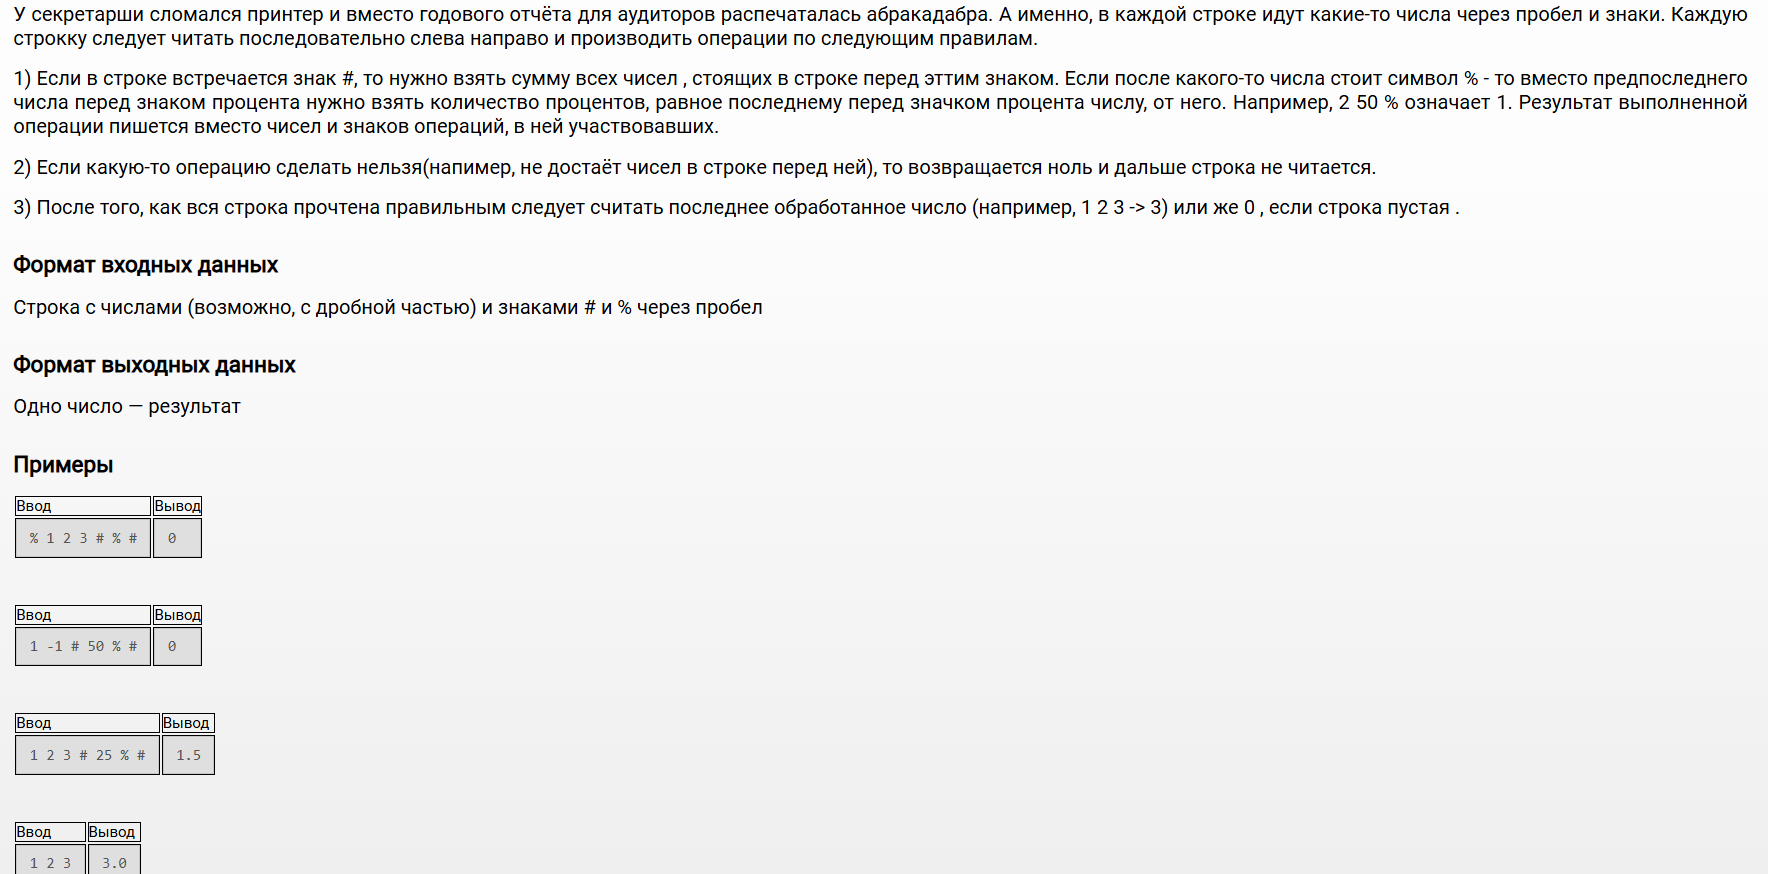

In [ ]:
def line(line):
    elements = line.split()
    stack = []
    
    for element in elements:
        
        if element.replace('.', '', 1).isdigit():
            stack.append(float(element))
            
        elif element == '#':
            if len(stack) < 1:
                return 0.0
            total = sum(stack)
            stack = [total]
            
        elif element == '%':
            if len(stack) < 2:
                return 0.0
            percent_value = stack.pop()
            base_value = stack.pop()
            new_value = base_value * (percent_value/100)
            stack.append(new_value)
            
        else:
            return 0.0

    return stack[-1] if stack else 0.0

s = input()
print(line(s))

### C-Обратная польская запись
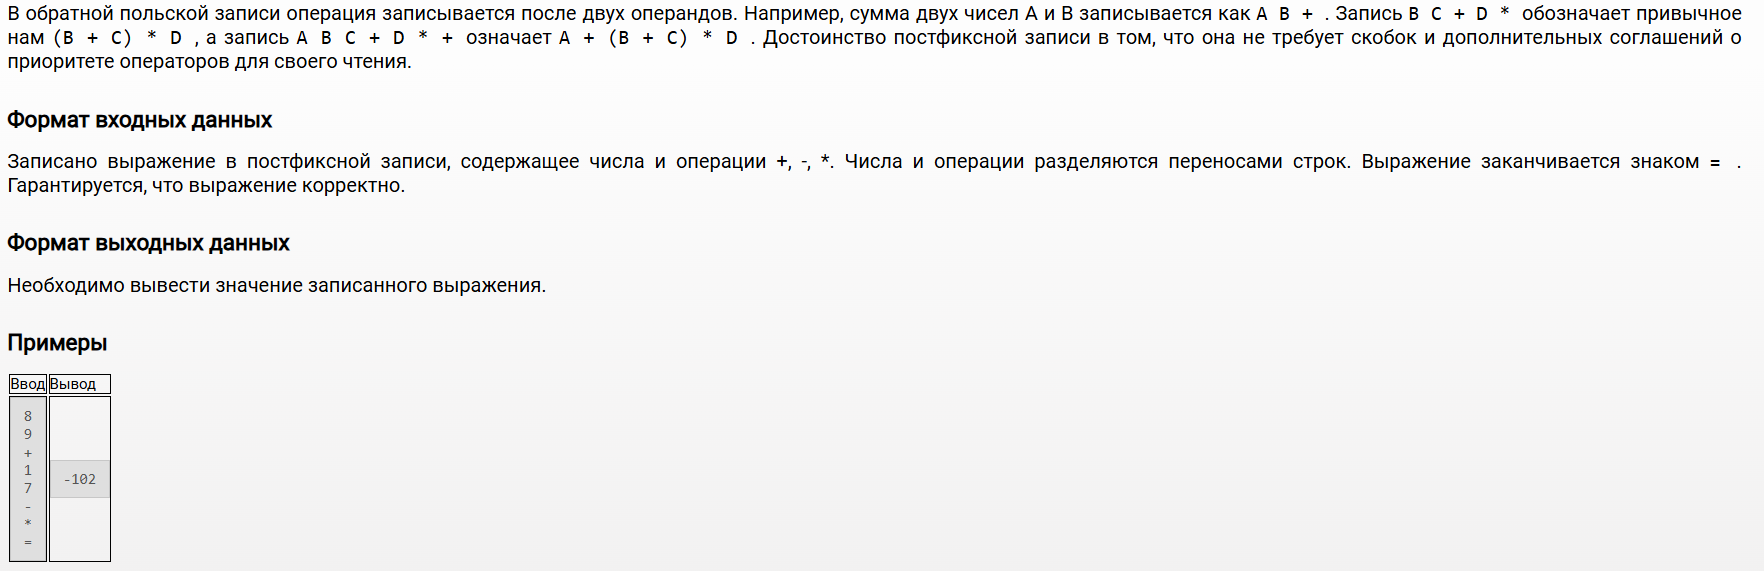

In [ ]:
stack = []
n = 0

def is_number(str):
    try:
        int(str)
        return True
    except ValueError:
        return False
    
while n != '=':
    n = input()
    if is_number(n):
        stack.append(int(n))
    elif n == '+':
        b = stack.pop()
        a = stack.pop()
        stack.append(a+b)
    elif n == '-':
        b = stack.pop()
        a = stack.pop()
        stack.append(a-b)
    elif n == '*':
        b = stack.pop()
        a = stack.pop()
        stack.append(a*b)

print(*stack)

### D-Построение кучи
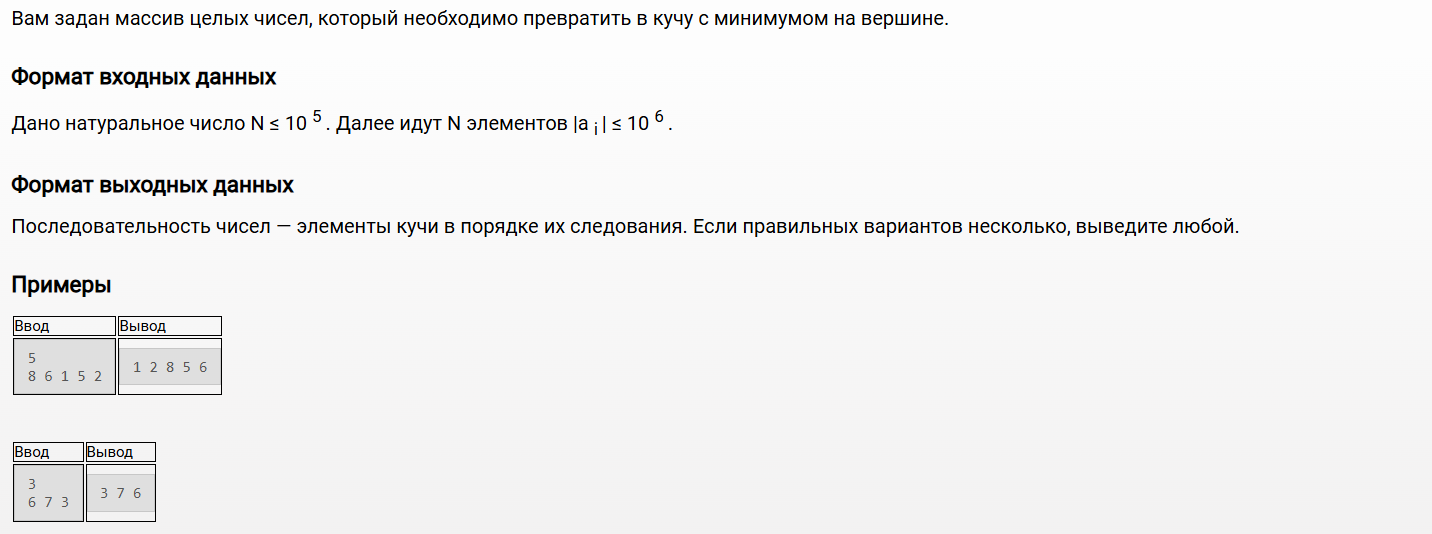

In [ ]:
def push(h, element):
    h.append(element)
    shift_up(h, len(h) - 1)

def shift_up(h, i):
    if i == 0:
        return
    p = (i - 1) // 2

    if h[i] < h[p]:
        h[i], h[p] = h[p], h[i]
        shift_up(h, p)

n = int(input())
s = list(map(int, input().split()))
h = []
for i in s:
    push(h, i)

print(*h)

### E-Сортировка кучей
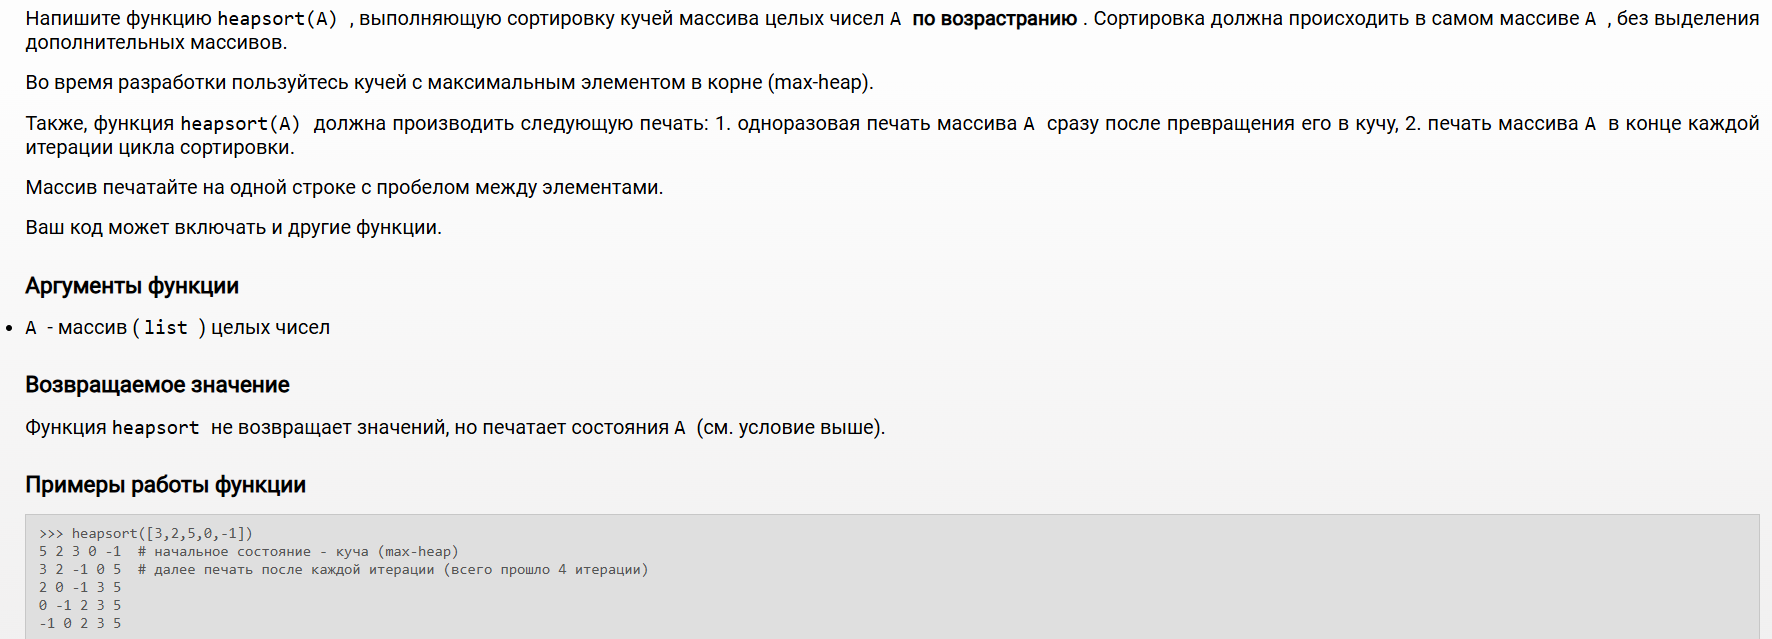

In [ ]:
def heapify(arr,n,i):
    maximum = i
    left = 2*i + 1
    right = 2*i + 2
    if left < n and arr[maximum] < arr[left]:
        maximum = left
    if right < n and arr[maximum] < arr[right]:
        maximum = right
    if maximum != i:
        arr[maximum], arr[i] = arr[i], arr[maximum]
        heapify(arr, n, maximum)

def heapsort(arr):
    n = len(arr)
    for i in range(n,-1,-1):
        heapify(arr,n,i)
    print(*arr)
    for i in range(n-1,0,-1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
        print(*arr)

# Контест 4 Двоичные деревья поиска

### Задача A - Дерево - проверка корректности
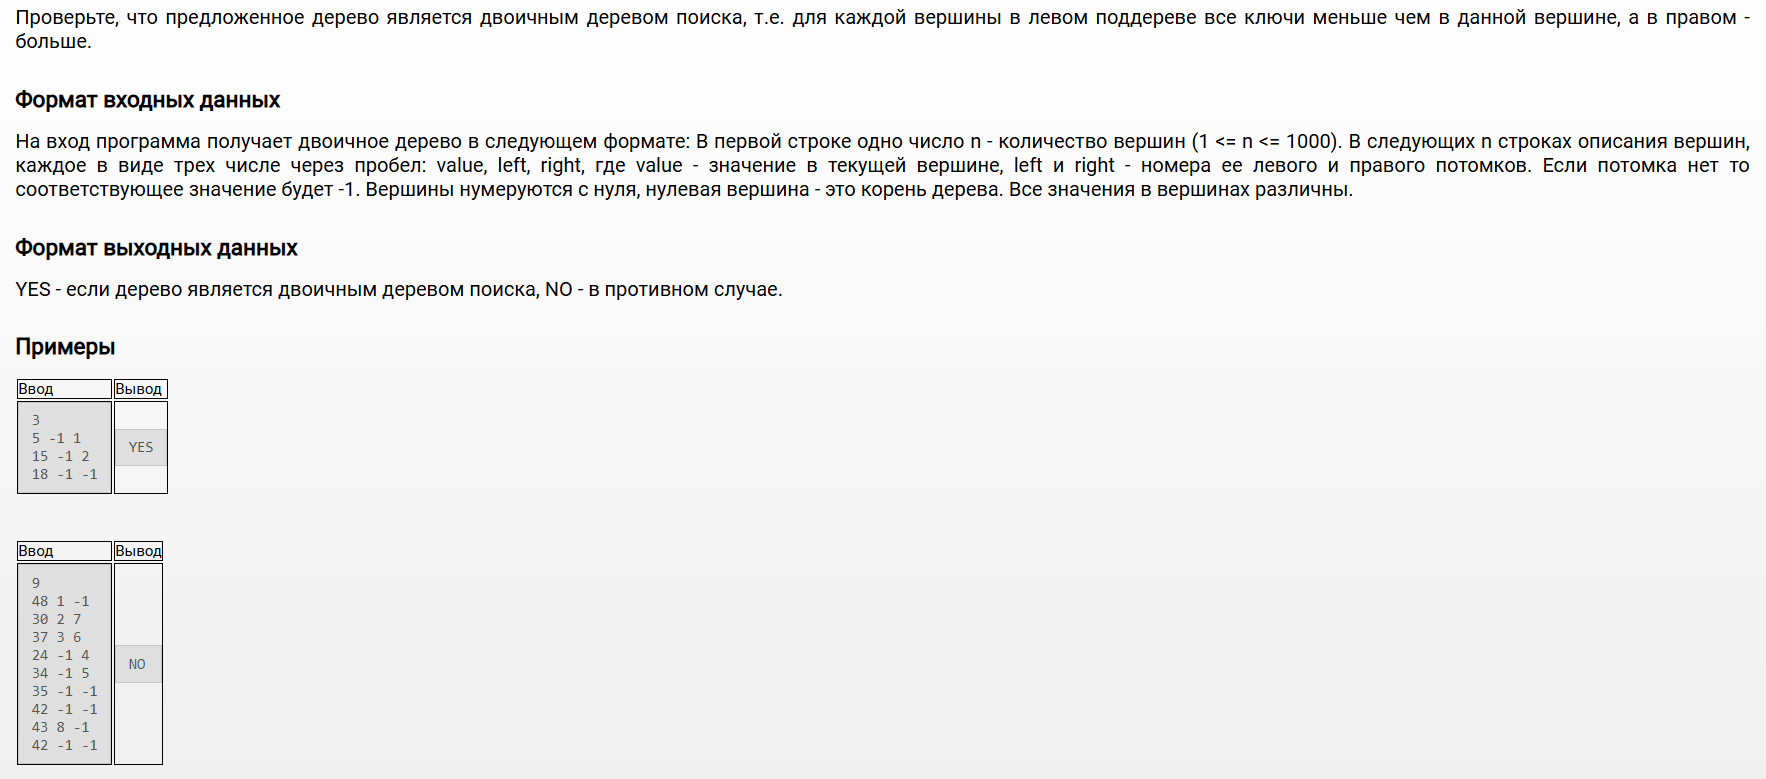

In [ ]:
def BinTree(arr, index, min_val = float('-inf'), max_val = float('+inf')):
    if index == -1:
        return True
    elif max_val < arr[index][0] or arr[index][0] < min_val:
        return False
    else:
        return BinTree(arr, arr[index][1], min_val, arr[index][0]) and BinTree(arr, arr[index][2], arr[index][0], max_val)
    
n = int(input())
arr = []
for i in range(n):
    arr.append(list(map(int, input().split())))

if BinTree(arr, 0):
    print('YES')
else:
    print('NO')

### Задача B - Высота дерева
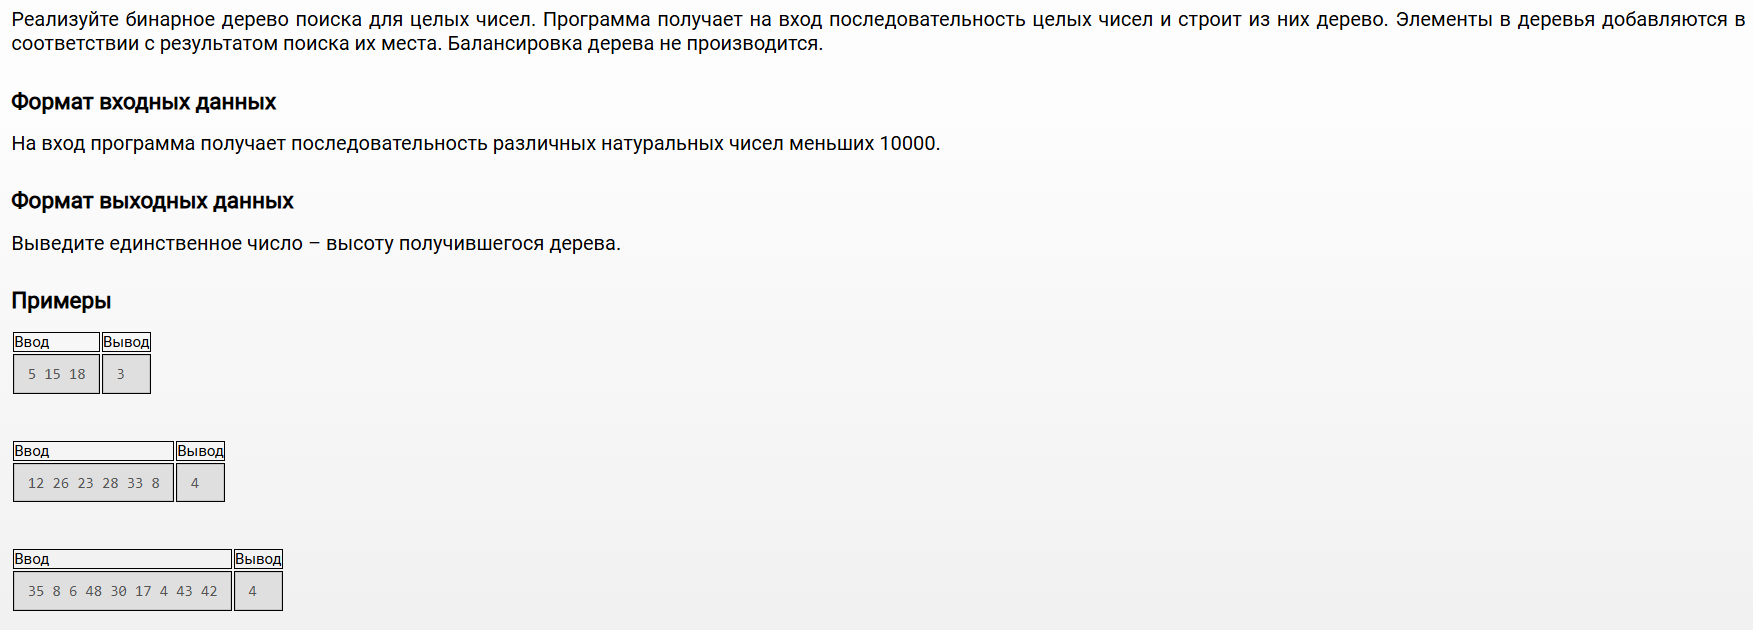

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

    def add(self, data):
        if data > self.data:
            if self.right is None:
                self.right = Node(data)
            else:
                self.right.add(data)
        else:
            if self.left is None:
                self.left = Node(data)
            else:
                self.left.add(data)

    def __str__(self):
        return (
                (str(self.left) if self.left is not None else '')+
                f' {self.data}'+
                (str(self.right) if self.right is not None else '') )

class BinTree:
    def __init__(self):
        self.root = None

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self.root.add(data)

    def height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if node is None:
            return 0
        left_height = self._height_recursive(node.left)
        right_height = self._height_recursive(node.right)
        return max(left_height, right_height) + 1

    def __str__(self):
        return str(self) if self.root is not None else ''
    
if __name__ == "__main__":
    numbers = list(map(int, input().split()))
    tree = BinTree()
    for number in numbers:
        tree.add(number)
    print(tree.height())

### задача C - Дерево - листья
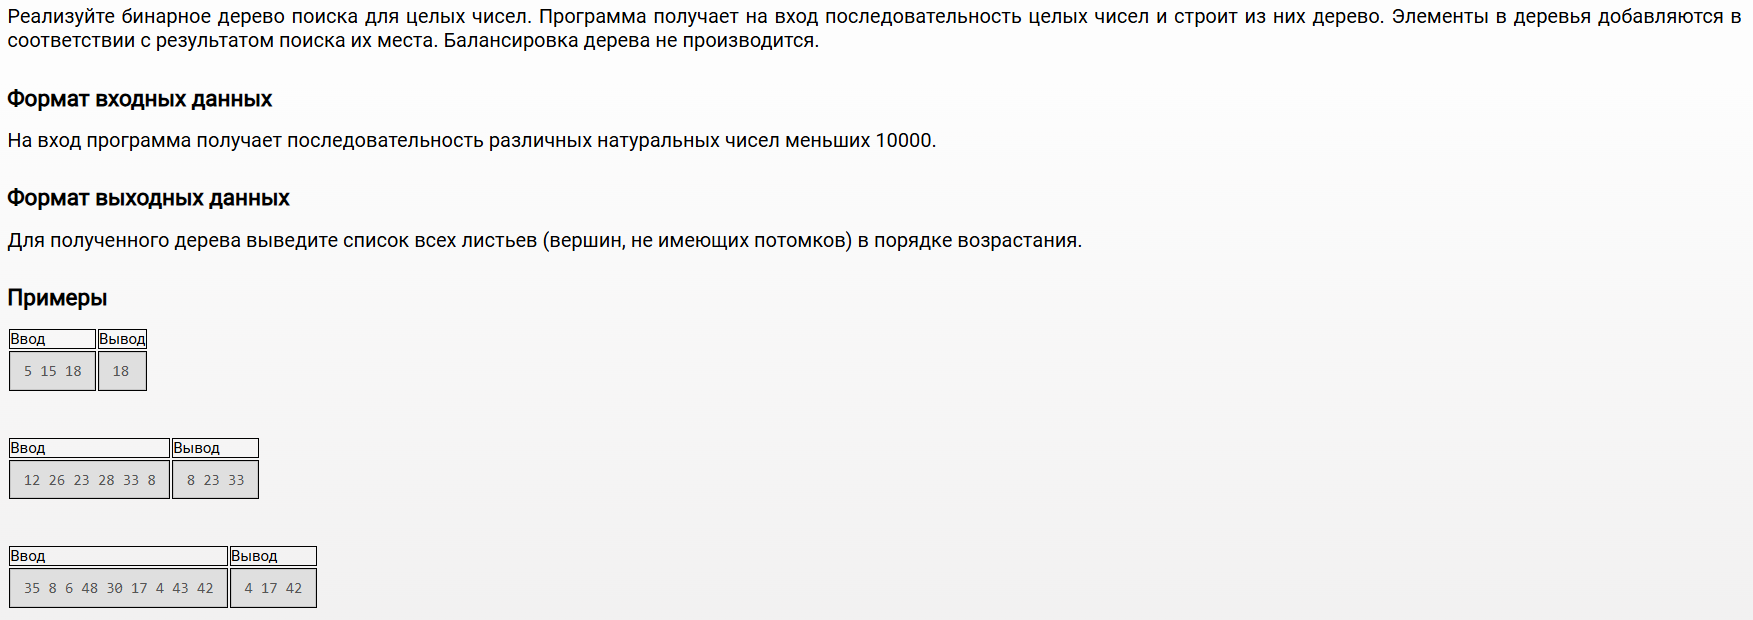

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

    def add(self, data):
        if data > self.data:
            if self.right is None:
                self.right = Node(data)
            else:
                self.right.add(data)
        else:
            if self.left is None:
                self.left = Node(data)
            else:
                self.left.add(data)

    def __str__(self):
        return (
                (str(self.left) if self.left is not None else '')+
                f' {self.data}'+
                (str(self.right) if self.right is not None else '') )

class BinTree:
    def __init__(self):
        self.root = None

    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self.root.add(data)

    def get_leaves(self):
        leaves = []
        self.get_leaves_recursive(self.root, leaves)
        leaves.sort()
        return leaves

    def get_leaves_recursive(self, node, leaves):
        if node is None:
            return
        if node.left is None and node.right is None:
            leaves.append(node.data)
        else:
            self.get_leaves_recursive(node.left, leaves)
            self.get_leaves_recursive(node.right, leaves)

    def __str__(self):
        return str(self) if self.root is not None else ''
    
if __name__ == "__main__":
    numbers = list(map(int, input().split()))
    tree = BinTree()
    for number in numbers:
        tree.add(number)
    leaves = tree.get_leaves()
    print(*leaves)

# Контест 5 - Односвяный список

### Задача A - Абстрактный одноступ
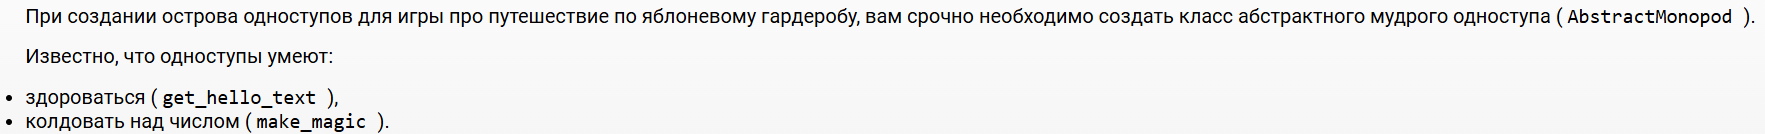

In [ ]:
import abc

class AbstractMonopod(abc.ABC):

    @abc.abstractmethod
    def get_hello_text(self) -> str:
        pass

    @abc.abstractmethod
    def make_magic(self, number: int) -> int:
        pass

### Задача B-Одноступы
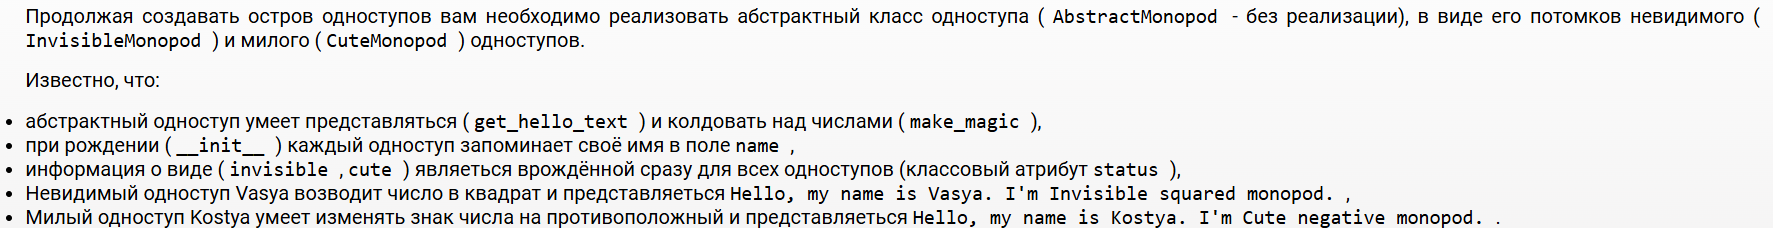

In [ ]:
from abc import ABC, abstractmethod

class AbstractMonopod(ABC):
    # Класс-атрибут
    status = None

    def __init__(self, name):
        self.name = name

    @abstractmethod
    def get_hello_text(self):
        pass

    @abstractmethod
    def make_magic(self, number):
        pass


class InvisibleMonopod(AbstractMonopod):
    status = "invisible"

    def get_hello_text(self):
        return f"Hello, my name is {self.name}. I'm Invisible squared monopod."

    def make_magic(self, number):
        return number ** 2


class CuteMonopod(AbstractMonopod):
    status = "cute"

    def get_hello_text(self):
        return f"Hello, my name is {self.name}. I'm Cute negative monopod."

    def make_magic(self, number):
        return -number

### Задача C-Односвязный список
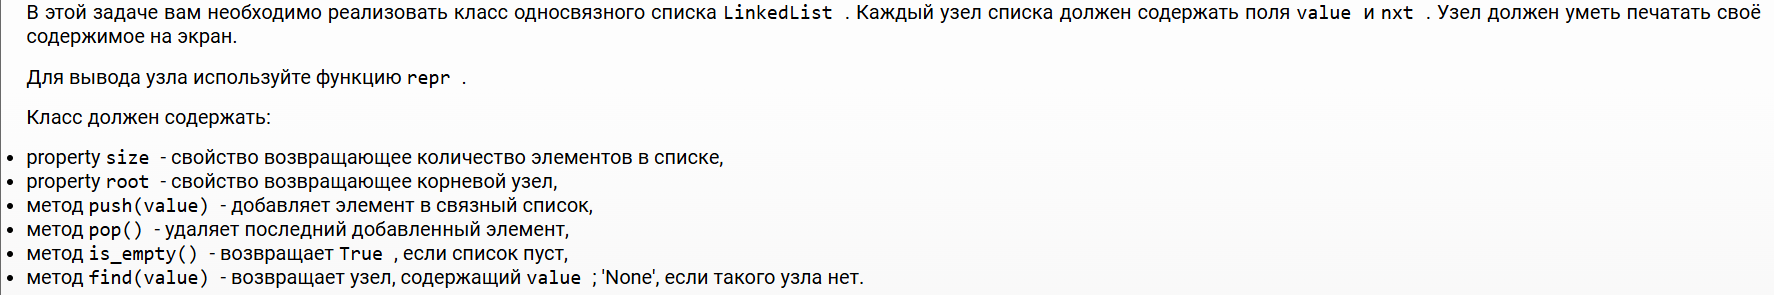

# Контест 6 - Графы. Обход в глубину (dfs)
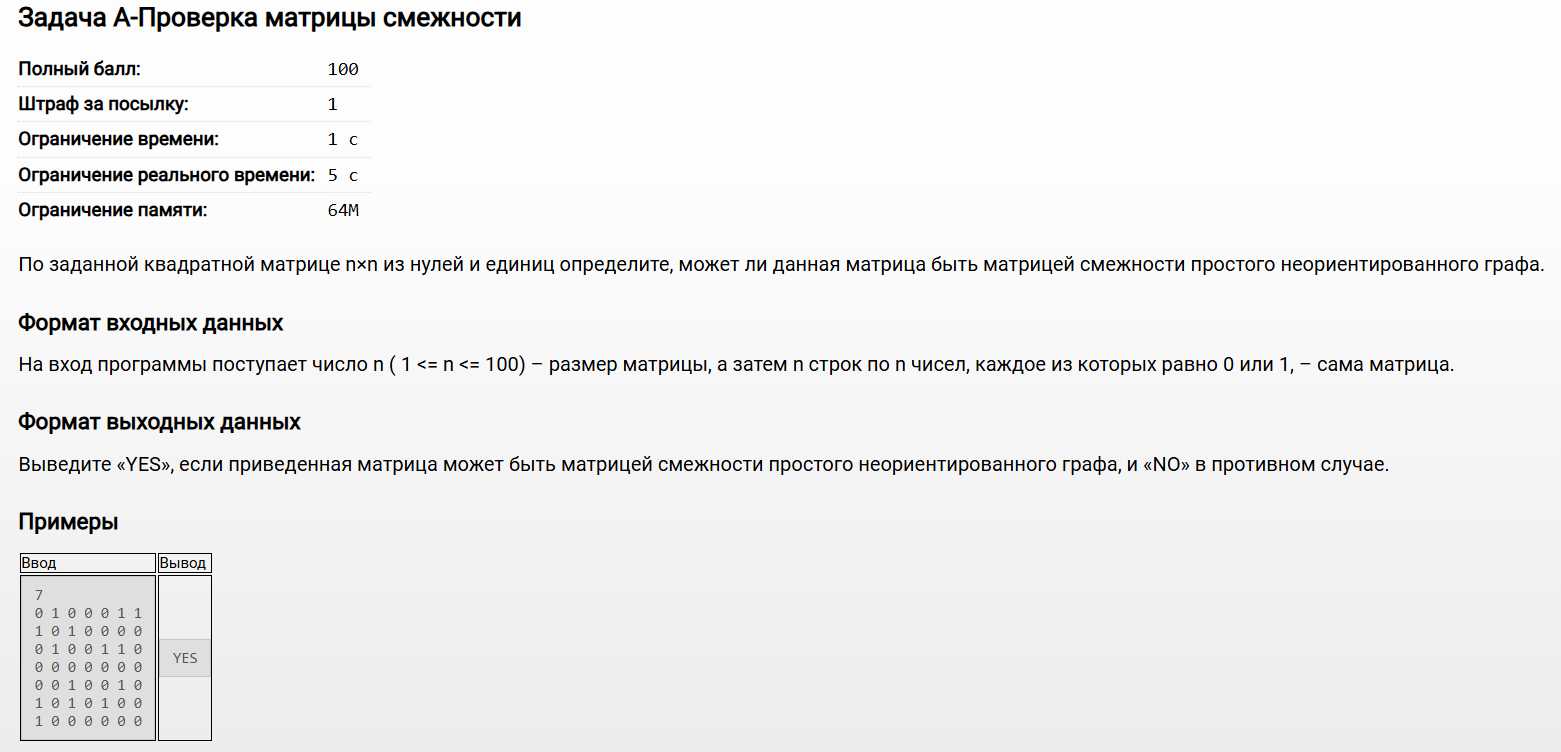

In [1]:
n = int(input())
m = []

for i in range(n):
    m.append(list(map(int, input().split())))

flag = False
for i in range(n):
    for j in range(n):
        if m[i][j] != m[j][i]:
            flag = True

print('NO' if flag else 'YES')

 7
 0 1 0 0 0 1 1
 1 0 1 0 0 0 0
 0 1 0 0 1 1 0
 0 0 0 0 0 0 0
 0 0 1 0 0 1 0
 1 0 1 0 1 0 0
 1 0 0 0 0 0 0


YES


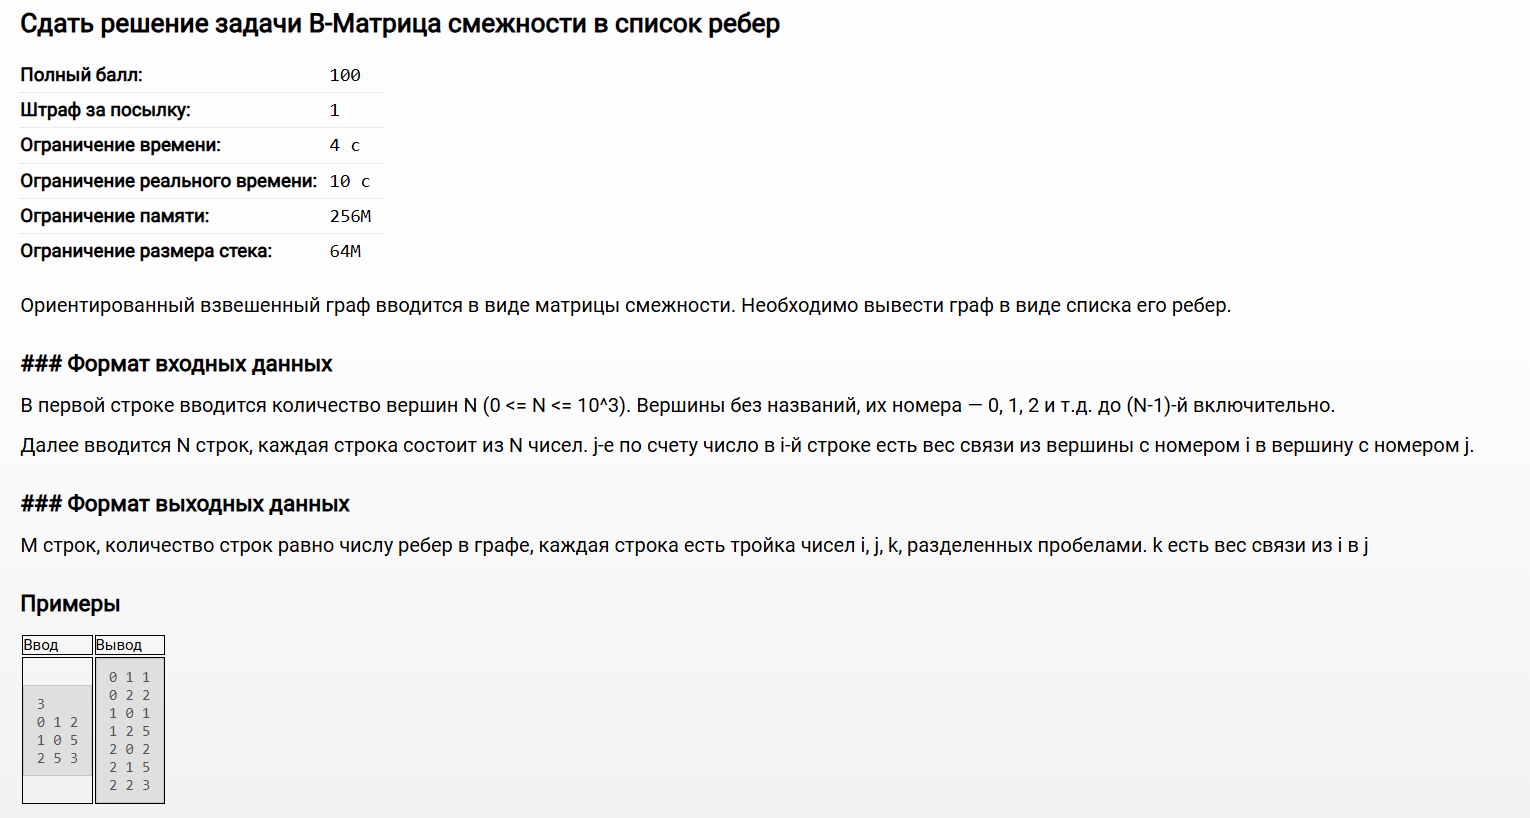

In [2]:
n = int(input())
m = []

for i in range(n):
    m.append(list(map(int, input().split())))

l = []
for i in range(n):
    for j in range(n):
        if m[i][j] == 0:
            continue
        print(i, j, m[i][j])

 3
 0 1 2
 1 0 5
 2 5 3


0 1 1
0 2 2
1 0 1
1 2 5
2 0 2
2 1 5
2 2 3


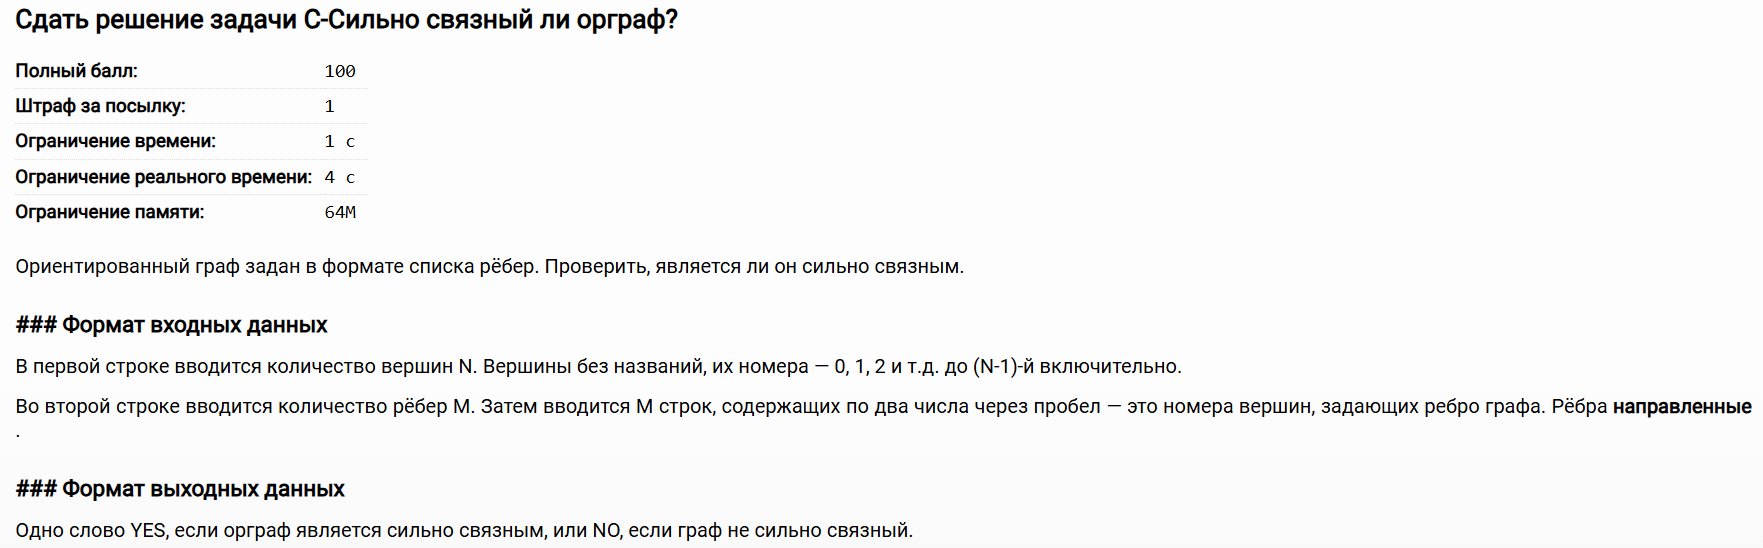
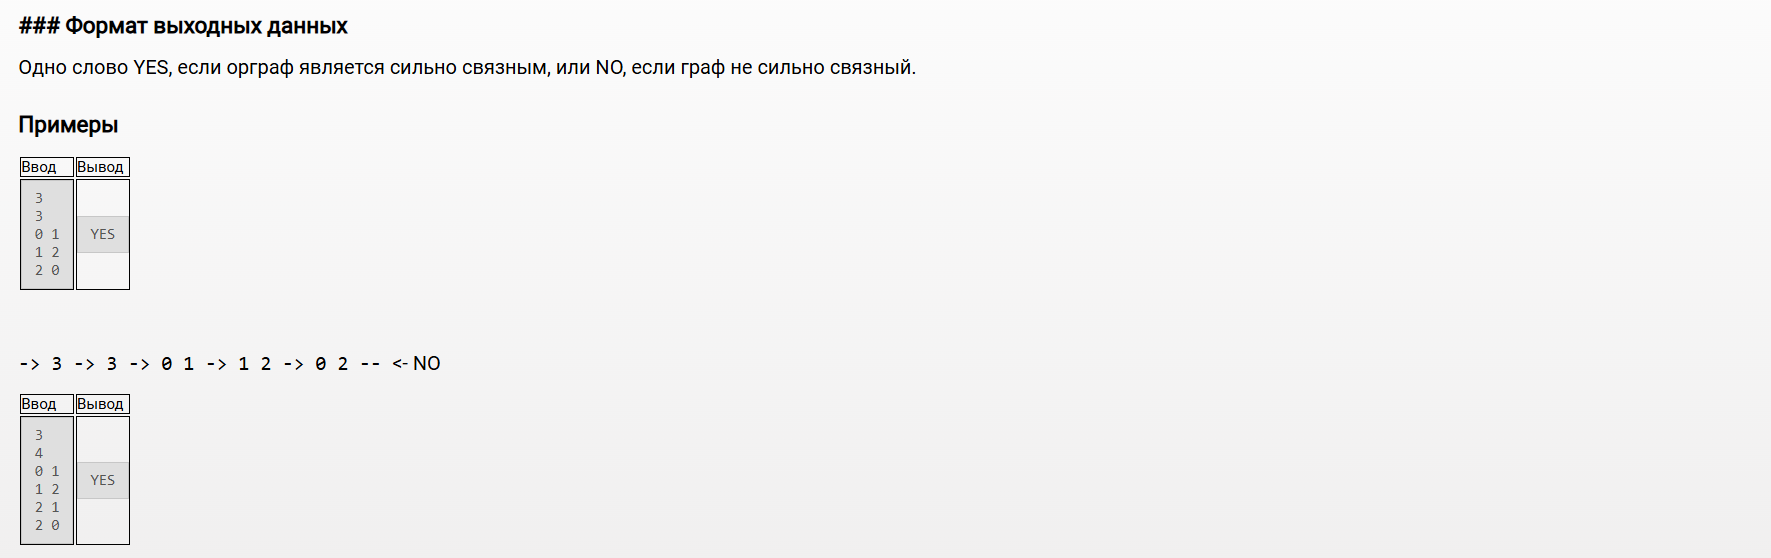

In [3]:
n = int(input())
m = int(input())
p = []
for i in range(m):
    p.append(list(map(int,input().split())))

graph = {i:[] for i in range(n)}

for elem in p:
    if graph.get (elem[0], 0) == 0:
        graph [elem[0]] = []
    graph [elem[0]].append (elem[1])


def dfs(visited, graph, node):
    if node not in visited:
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
    return(visited)

flag = False

for key in graph.keys():
    visited=set()
    dfs(visited, graph, key)
    if len(visited) != len(graph):
        flag = True

print('NO' if flag else 'YES')

 3
 3
 0 1
 1 2
 2 0


YES


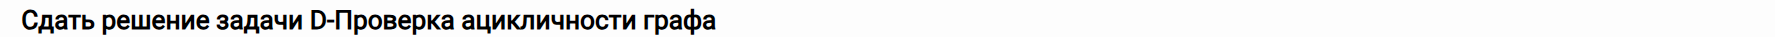
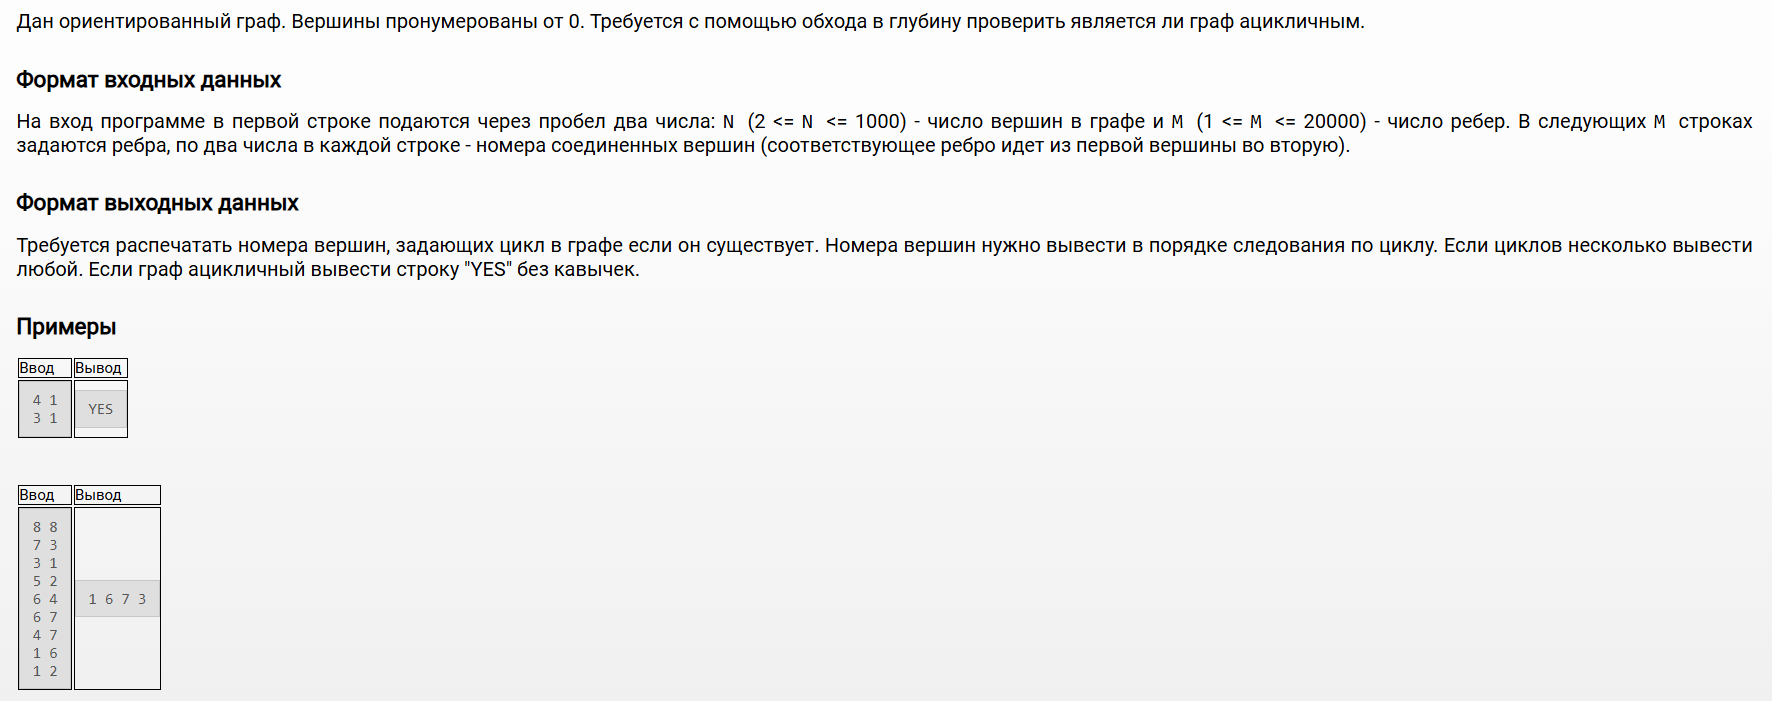

In [1]:
def read_graph(M):
    G = {}
    for i in range(M):
        v1, v2 = list(map(int, input().split()))
        for v in v1, v2:
            if v not in G:
                G[v] = []
        G[v1].append(v2)
    return G

def dfs(G, vertex, used, stack, path):
    used.add(vertex)
    for v in G[vertex]:
        if v not in used:
            path.append(v)
            dfs(G, v, used, stack, path)
    path.pop(len(path)-1)
    if len(G[vertex]) > 0 and -1 not in stack and len(path) > 0:
        # print(path)
        for v1 in G[vertex]:
            if v1 in path:
                path.append(vertex)
                stack.append(-1)
                stack.extend(path[path.index(v1):])
                stack.append(-1)
                break

n, m = list(map(int, input().split()))
flag = False

G = read_graph(m)
used = set()
stack = []
path = []
for vertex in G.keys():
    if vertex not in used and not flag:
        path.append(vertex)
        dfs(G, vertex, used, stack, path)
        if -1 in stack:
            flag = True
            break

start_cycle = -1
end_cycle = -1

if not flag:
    print('YES')
else:
    for i in range(len(stack)):
        if stack[i] == -1 and start_cycle == -1:
            start_cycle = i
        elif stack[i] == -1 and end_cycle == -1:
            end_cycle = i
            break
    print(*stack[start_cycle + 1:end_cycle])

 8 8
 7 3
 3 1
 5 2
 6 4
 6 7
 4 7
 1 6
 1 2


7 3 1 6 4


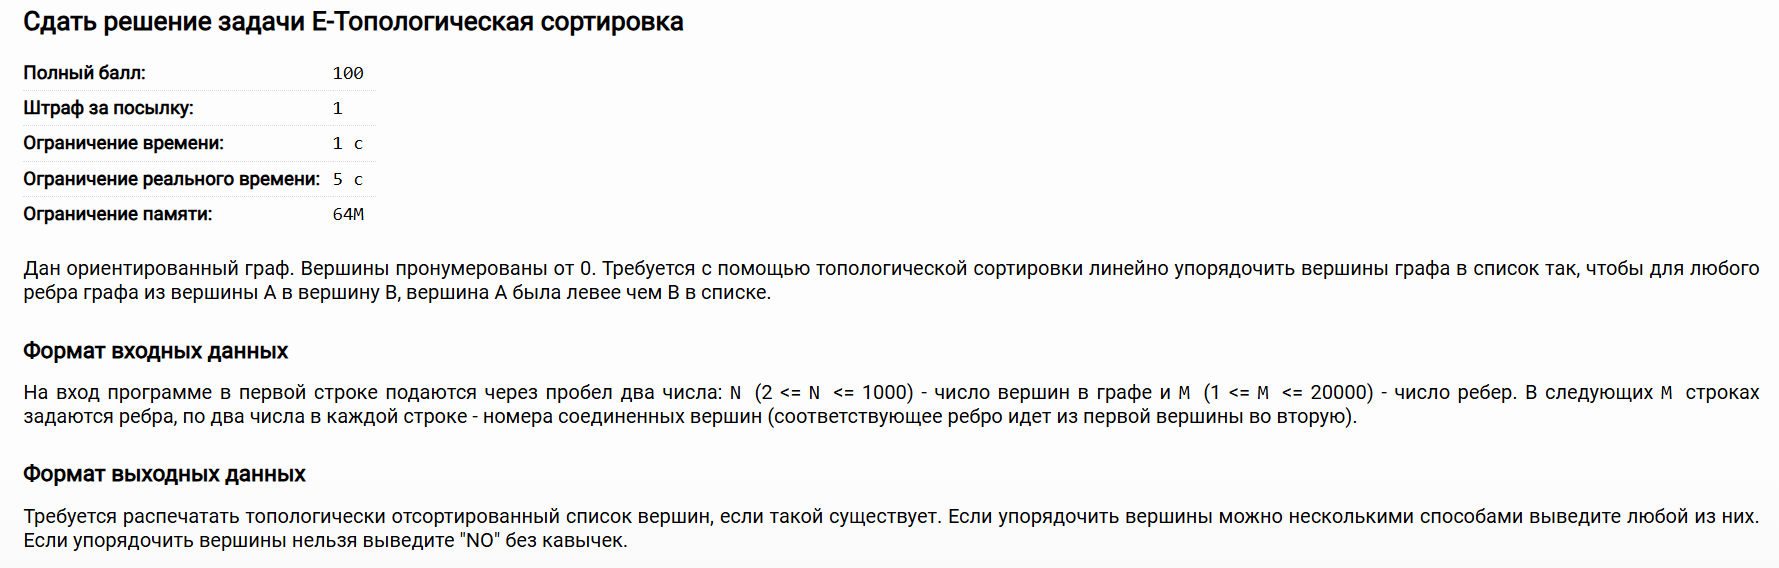
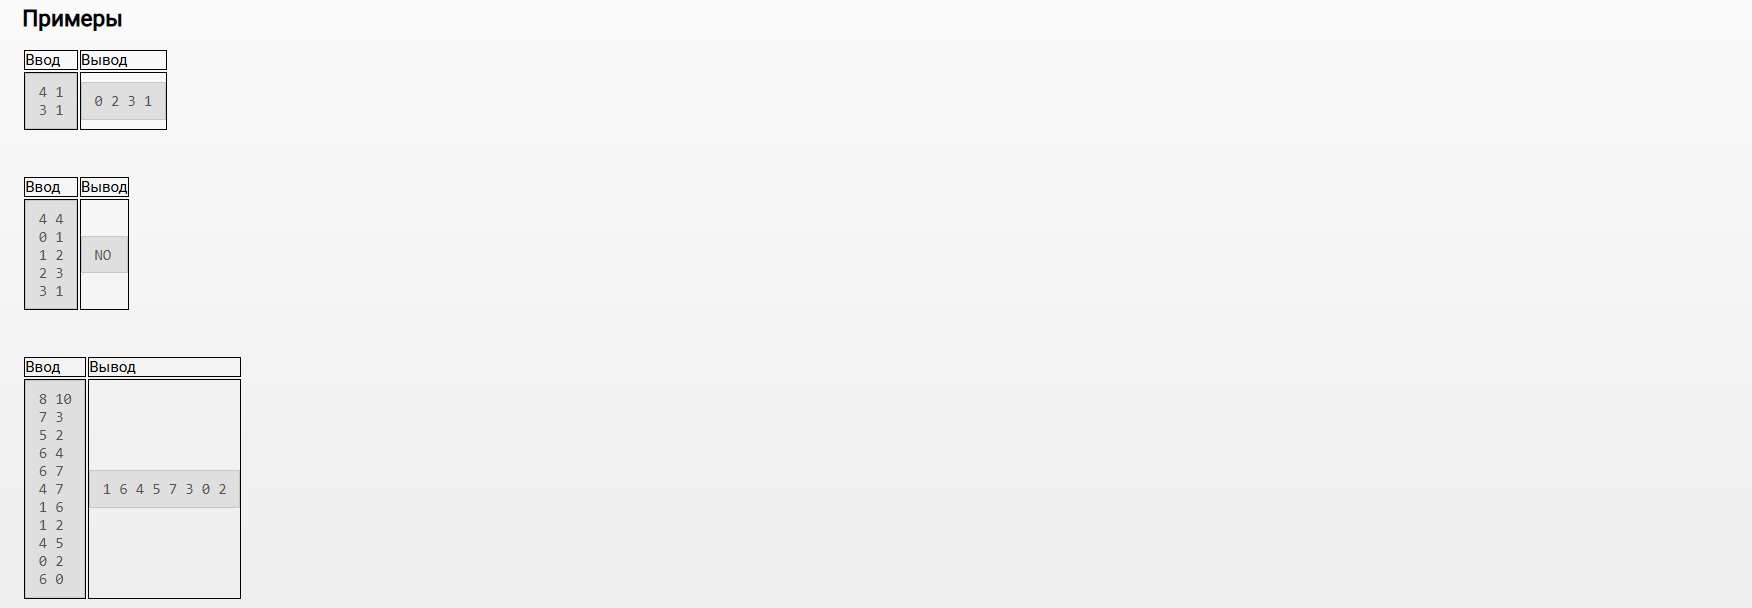

In [7]:
def topological_sort(n, edges):
    graph = [[] for _ in range(n)]
    in_degree = [0] * n

    for u, v in edges:
        graph[u].append(v)
        in_degree[v] += 1

    queue = [i for i in range(n) if in_degree[i] == 0]
    result = []

    while queue:
        u = queue.pop(0)
        result.append(u)
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    if len(result) == n:
        return result
    else:
        return "NO"


n, m = map(int, input().split())
edges = []
for _ in range(m):
    u, v = map(int, input().split())
    edges.append((u, v))

result = topological_sort(n, edges)
if result == "NO":
    print("NO")
else:
    print(*result)

 8 10
 7 3
 5 2
 6 4
 6 7
 4 7
 1 6
 1 2
 4 5
 0 2
 6 0


1 6 4 0 7 5 3 2


# Контест 7 - Графы. Обход в ширину (bfs)

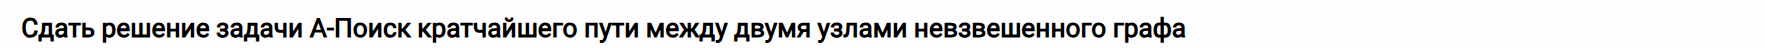
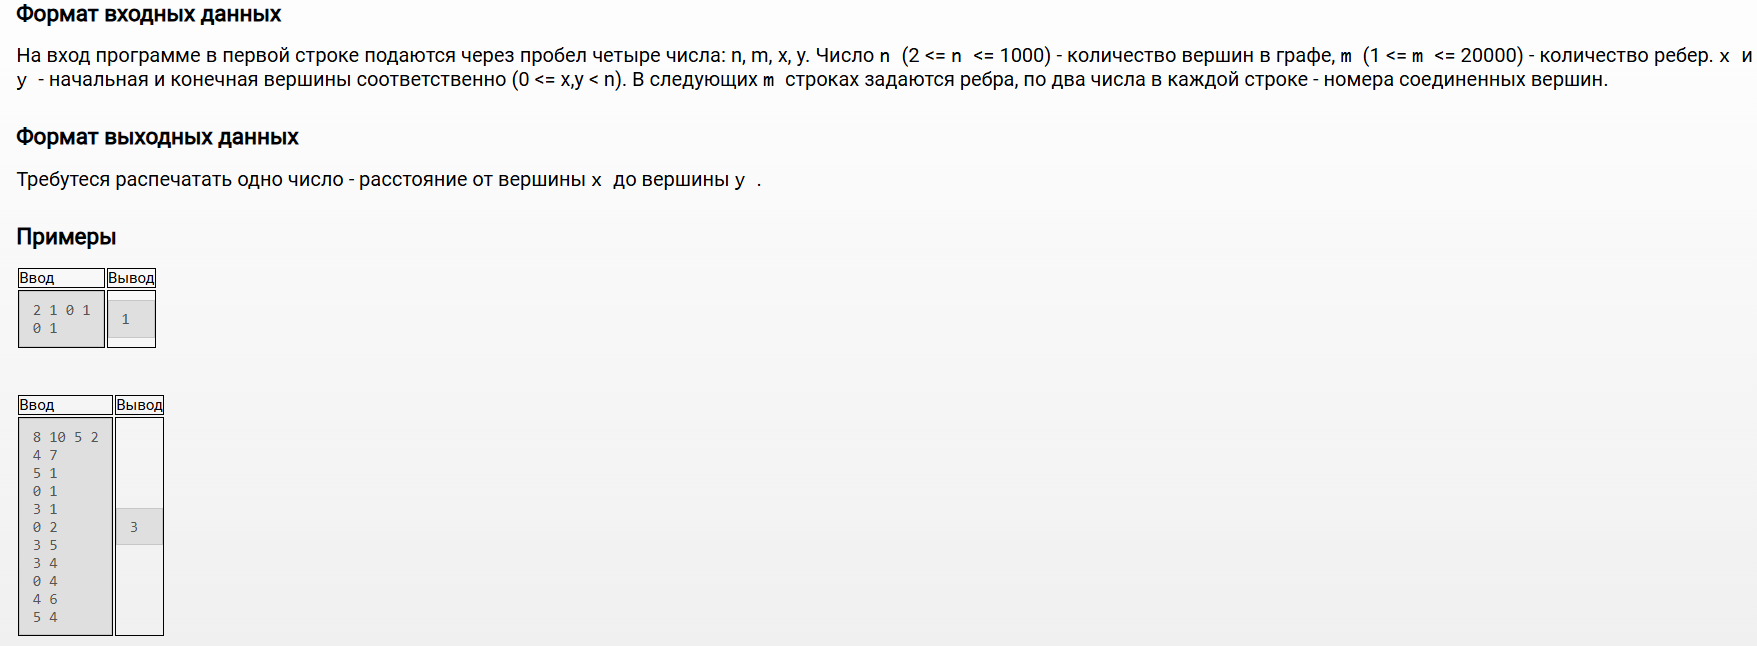

In [9]:
import collections

def bfs_distance(n, m, start_node, end_node, edges):
    adj_list = collections.defaultdict(list)
    for u, v in edges:
        adj_list[u].append(v)
        adj_list[v].append(u)

    distances = [-1] * n
    distances[start_node] = 0
    queue = collections.deque([start_node])

    while queue:
        curr_node = queue.popleft()
        for neighbor in adj_list[curr_node]:
            if distances[neighbor] == -1:
                distances[neighbor] = distances[curr_node] + 1
                queue.append(neighbor)

    return distances[end_node]


n, m, x, y = map(int, input().split())
edges = []
for _ in range(m):
    u, v = map(int, input().split())
    edges.append((u, v))

distance = bfs_distance(n, m, x, y, edges)
print(distance)

 8 10 5 2
 4 7
 5 1
 0 1
 3 1
 0 2
 3 5
 3 4
 0 4
 4 6
 5 4


3


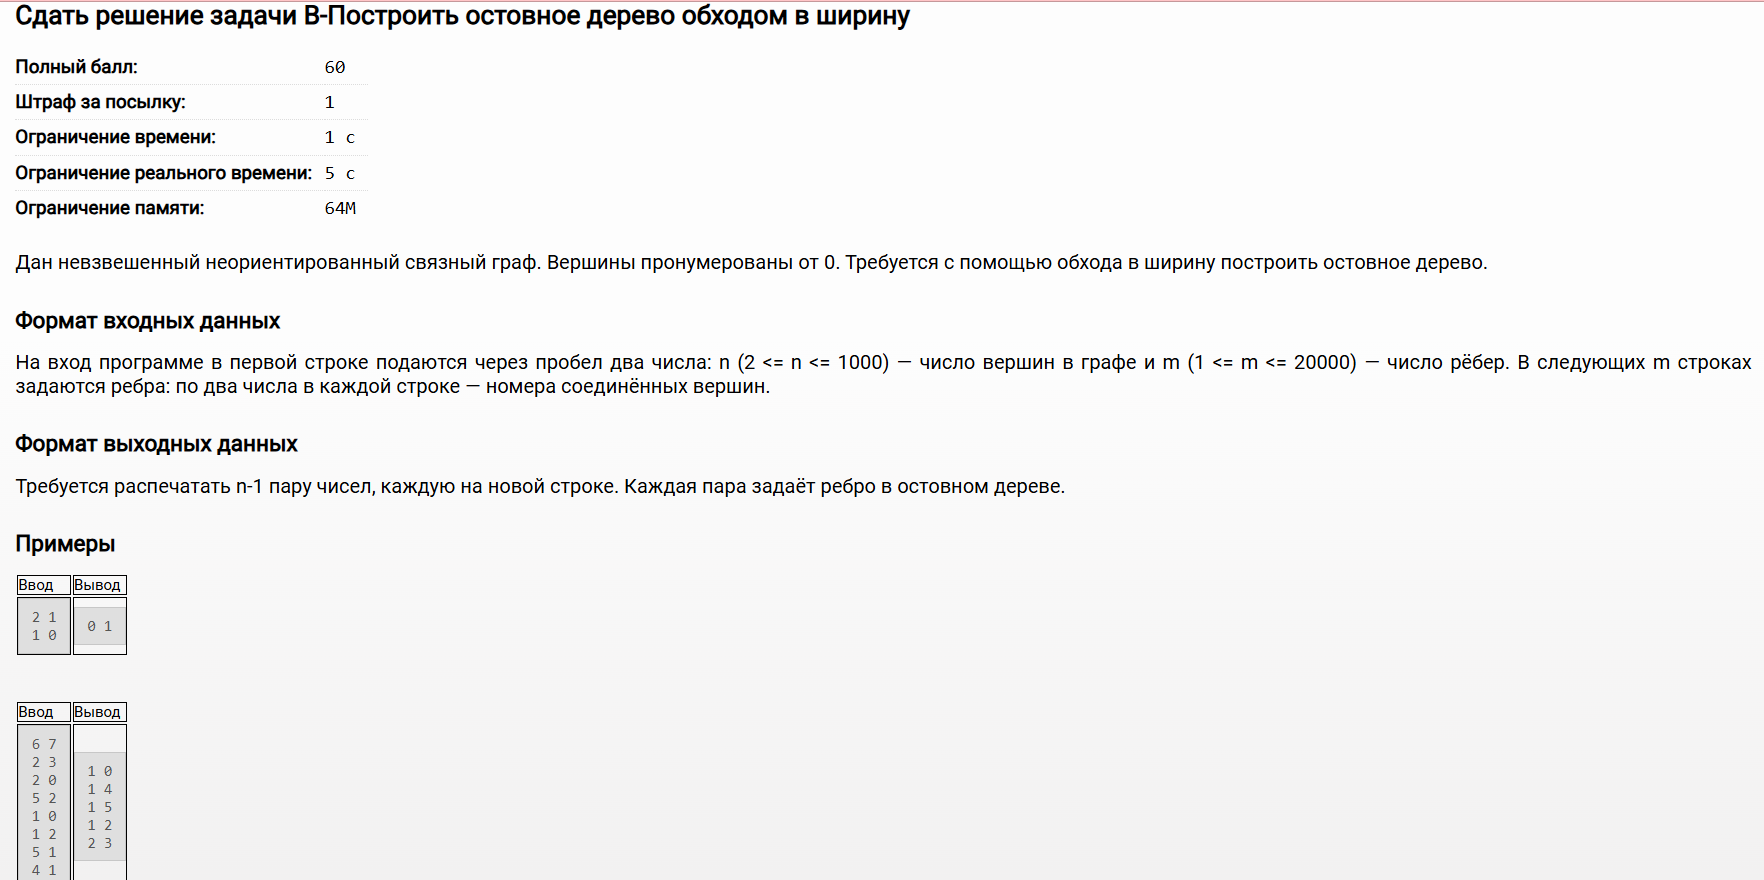

In [11]:
import collections

def bfs_spanning_tree(n, m, edges):
    adj_list = collections.defaultdict(list)
    for u, v in edges:
        adj_list[u].append(v)
        adj_list[v].append(u)

    spanning_tree_edges = []
    visited = [False] * n
    queue = collections.deque([0])
    visited[0] = True

    while queue:
        curr_node = queue.popleft()
        for neighbor in adj_list[curr_node]:
            if not visited[neighbor]:
                spanning_tree_edges.append((curr_node, neighbor))
                visited[neighbor] = True
                queue.append(neighbor)

    return spanning_tree_edges


n, m = map(int, input().split())
edges = []
for _ in range(m):
    u, v = map(int, input().split())
    edges.append((u, v))

spanning_tree = bfs_spanning_tree(n, m, edges)
for u, v in spanning_tree:
    print(u, v)

 2 1
 1 0


0 1


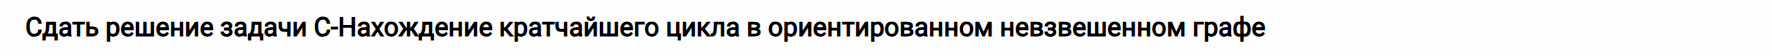
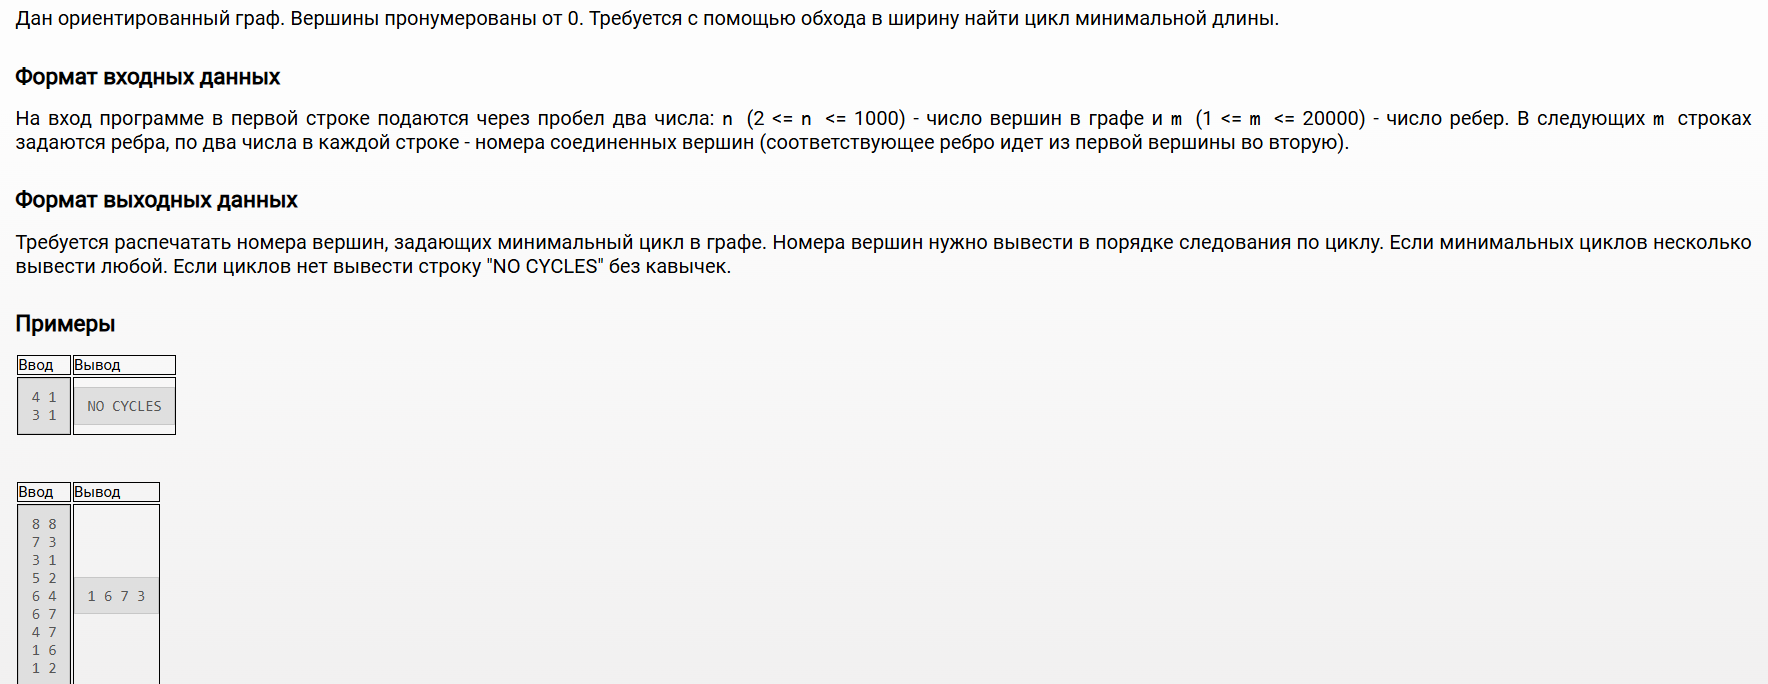

In [14]:
import collections

def find_shortest_cycle(n, m, edges):
    graph = collections.defaultdict(list)
    for u, v in edges:
        graph[u].append(v)

    min_cycle_len = float('inf')
    min_cycle = []

    for start_node in range(n):
        distances = [-1] * n
        parents = [-1] * n
        distances[start_node] = 0
        queue = collections.deque([(start_node, 0)])

        while queue:
            curr_node, dist = queue.popleft()
            for neighbor in graph[curr_node]:
                if distances[neighbor] == -1:
                    distances[neighbor] = dist + 1
                    parents[neighbor] = curr_node
                    queue.append((neighbor, dist + 1))
                elif neighbor != parents[curr_node]:
                    cycle_len = distances[curr_node] + distances[neighbor] + 1
                    if cycle_len < min_cycle_len:
                        min_cycle_len = cycle_len
                        min_cycle = []
                        curr = curr_node
                        min_cycle.append(curr)
                        while curr != neighbor:
                            curr = parents[curr]
                            min_cycle.append(curr)
                        min_cycle.append(neighbor)

    if min_cycle:
        return min_cycle
    else:
        return "NO CYCLES"


n, m = map(int, input().split())
edges = []
for _ in range(m):
    u, v = map(int, input().split())
    edges.append((u, v))

result = find_shortest_cycle(n, m, edges)
if result == "NO CYCLES":
  print("NO CYCLES")
else:
  print(*result)

 8 8
 7 3
 3 1
 5 2
 6 4
 6 7
 4 7
 1 6
 1 2


MemoryError: 

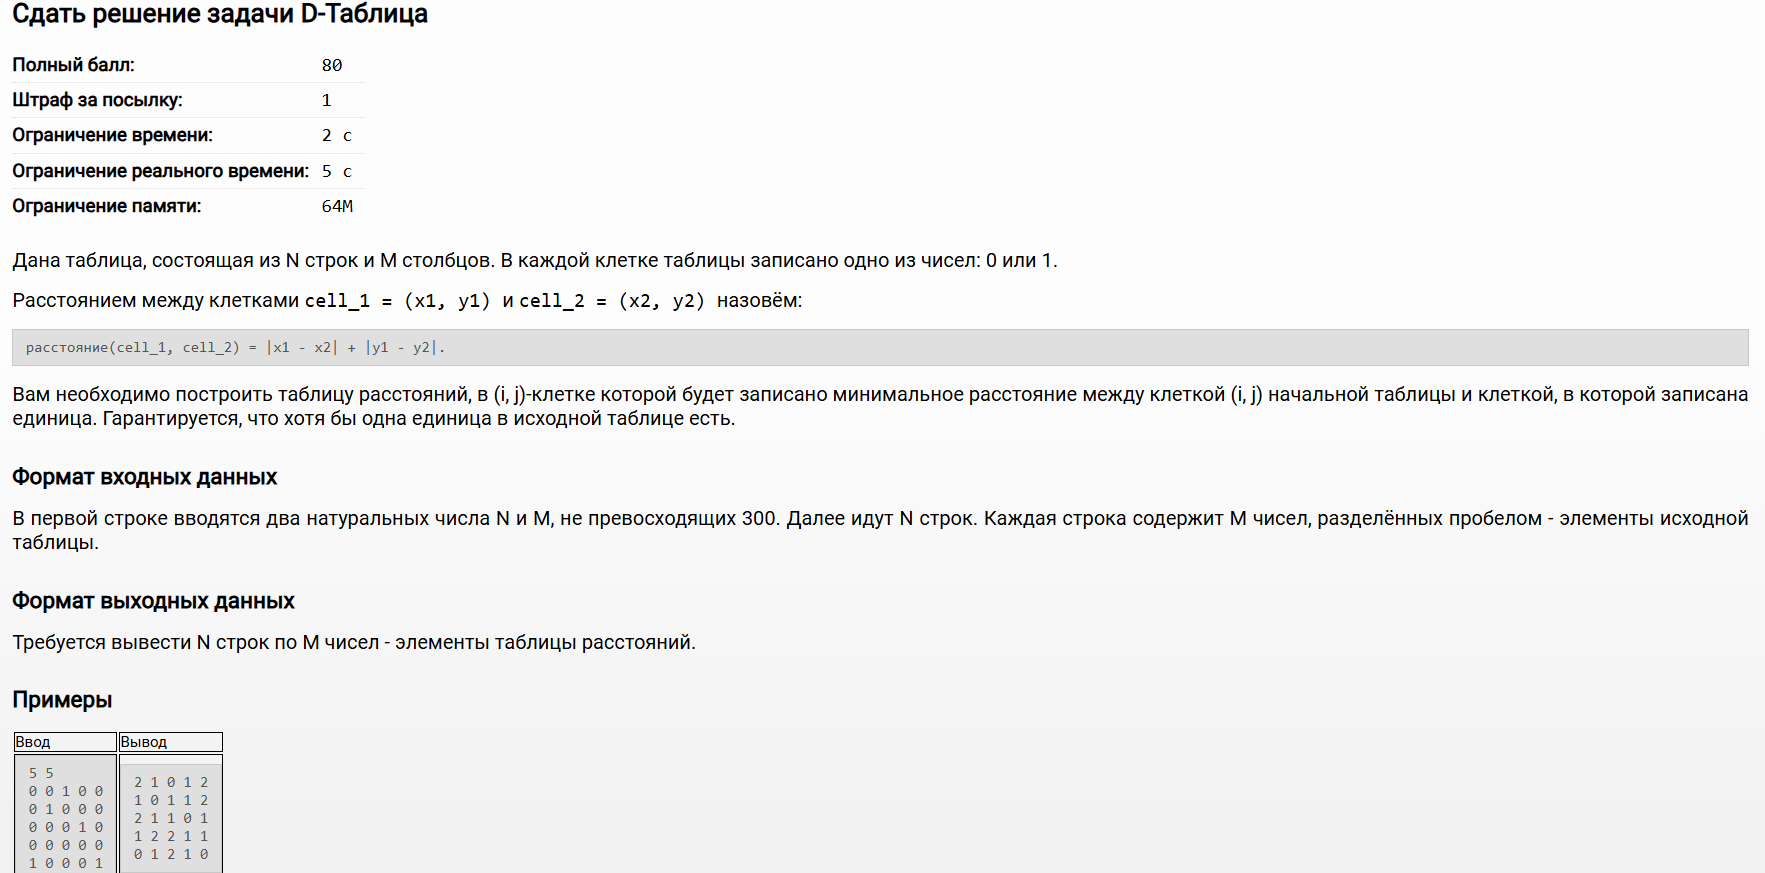

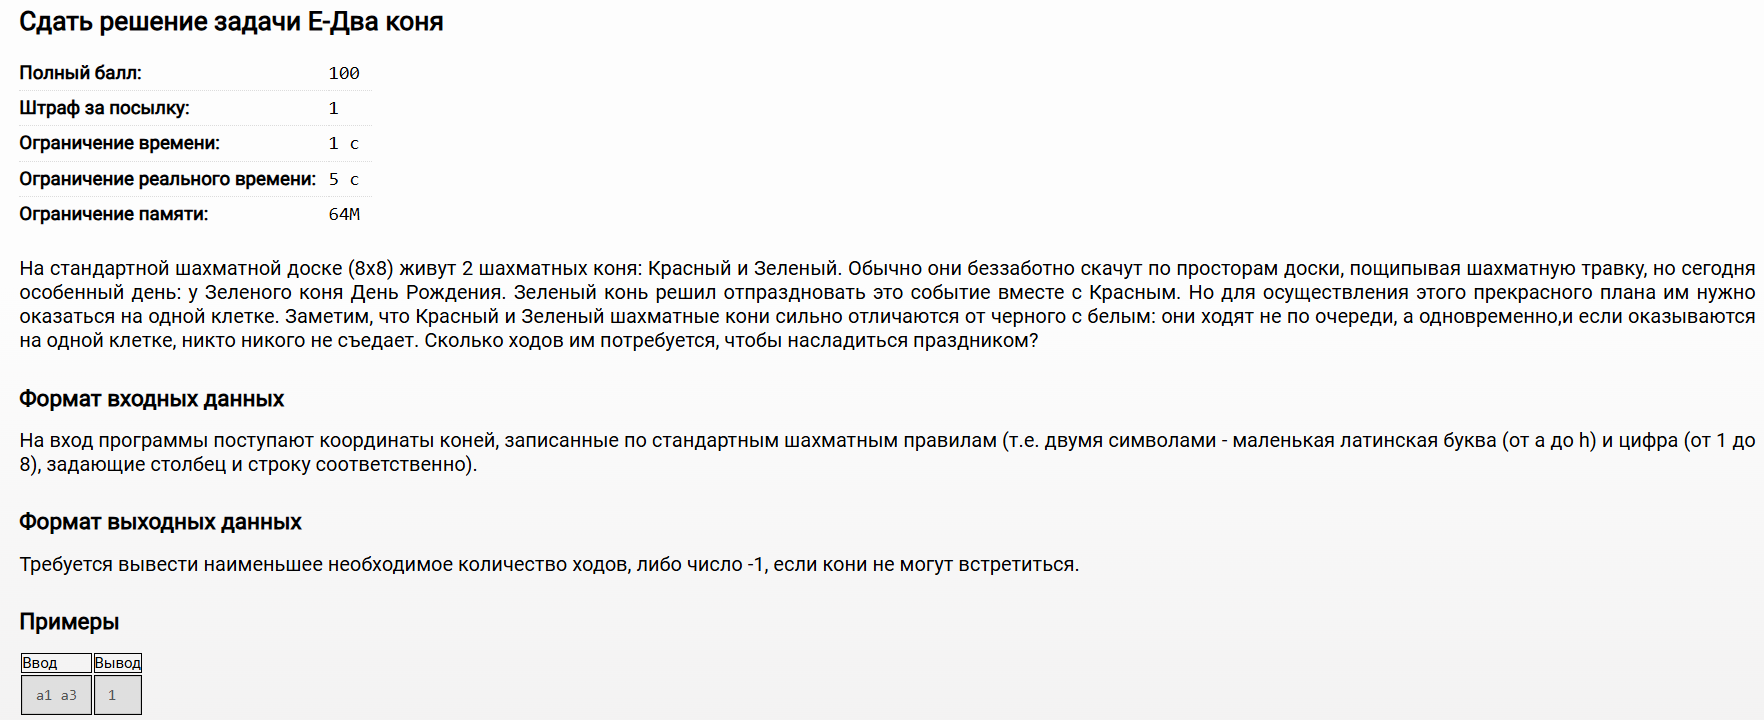

# Контест 8 - графы. поиск кратчайшего пути
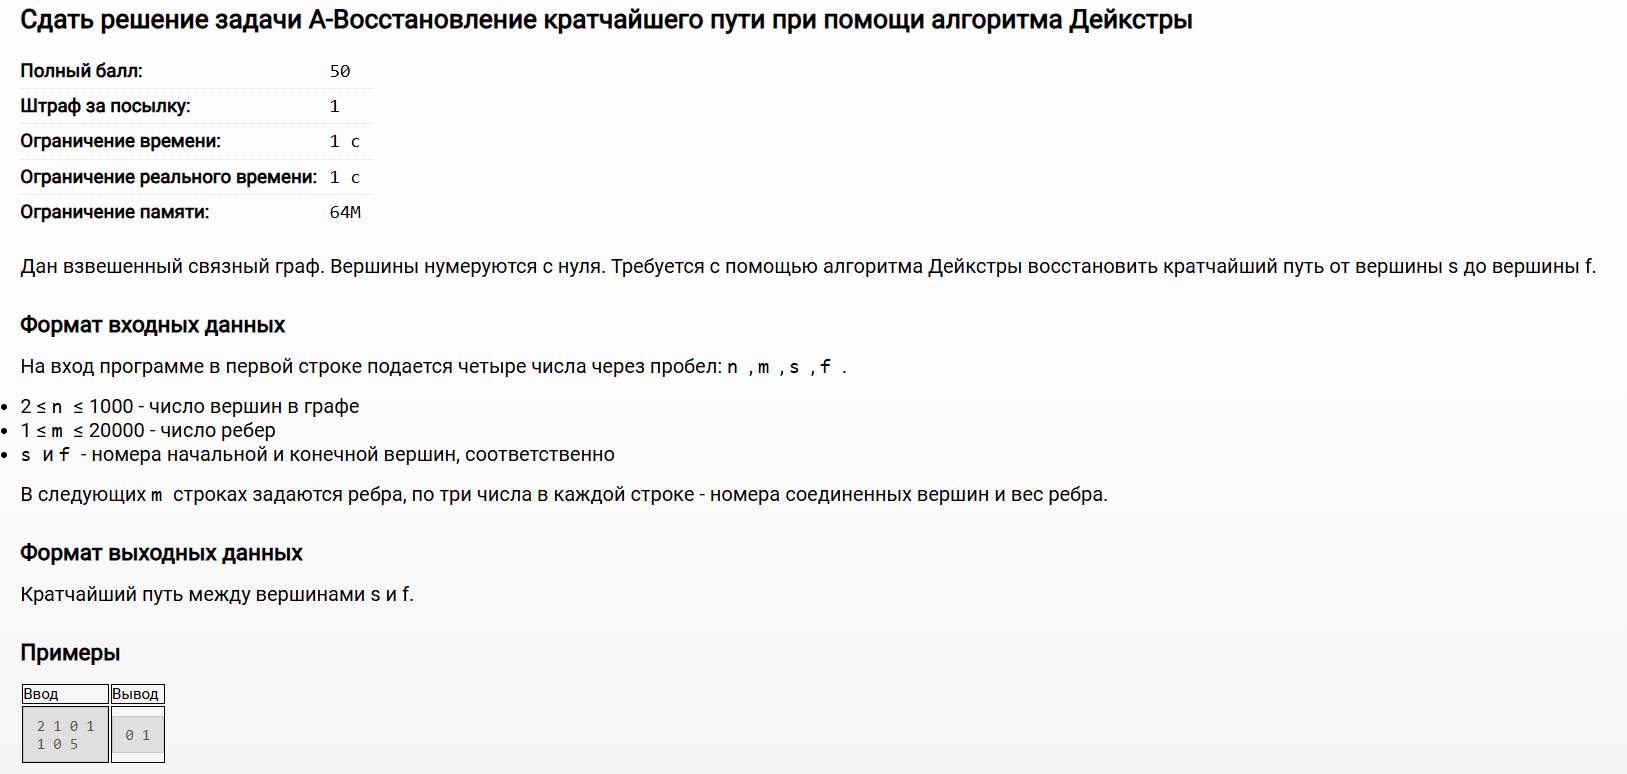

In [18]:
import heapq
G = {}
n, m, s, f = map(int, input().split())

def add_edge(G, u, v, weight):
    if u not in G:
        G[u] = {v : weight}
    else:
        G[u][v] = weight
        

def create_graph():
    for _ in range(m):
        u, v, weight = map(int, input().split())
        add_edge(G, u, v, weight)
        add_edge(G, v, u, weight)

def deykstra(G, start):
    h = []
    heapq.heappush(h, (0, start))
    dist = {v: float('+inf') for v in G}
    dist[start] = 0
    used = set()
    while len(h):
        w, v = heapq.heappop(h)
        if v in used:
            continue
        for neigh in G[v]:
            if w + G[v][neigh] < dist[neigh]:
                dist[neigh] = w + G[v][neigh]
                heapq.heappush(h, (dist[neigh], neigh))
        used.add(v)
    return dist

def min_path(G, start, finish):
    dist = deykstra(G, start)
    cur_v = finish
    min_path = [finish]
    while cur_v != start:
        for neigh in G[cur_v]:
            if dist[cur_v] == dist[neigh] + G[neigh][cur_v]:
                min_path.append(neigh)
                cur_v = neigh
                break
    return min_path[::-1]

create_graph()
print(*min_path(G, s, f))

 4 5 0 3
 0 1 10
 0 2 40
 1 2 15
 0 3 20
 3 1 5


0 1 3


In [2]:
# Задача A-Игра Делимость

n = int(input())
dp = [False] * (n + 1)

for stones in range(1, n + 1):
    remainder = stones % 3
    if remainder == 0:
        moves = [1, 2]
    elif remainder == 1:
        moves = [1, 3]
    else:
        moves = [1, 2, 3]
    
    dp[stones] = any(stones - move >= 0 and not dp[stones - move] for move in moves)

print(1 if dp[n] else 2)

 3


2


In [6]:
# Задача B-Сумма игр

n, k = map(int, input().split())
piles = list(map(int, input().split()))

xor_sum = 0
mod = k + 1
for pile in piles:
    xor_sum ^= (pile % mod)

print("YES" if xor_sum != 0 else "NO")

 1 6
 14


NO


In [7]:
# C-Игра на произвольном графе

import sys
from collections import deque

def main():
    input = sys.stdin.read().split()
    ptr = 0
    N, M, K = map(int, input[ptr:ptr+3])
    ptr +=3
    
    adj = [[] for _ in range(N)]
    reverse_adj = [[] for _ in range(N)]
    out_degree = [0] * N
    
    for _ in range(M):
        u, v = map(int, input[ptr:ptr+2])
        ptr +=2
        adj[u].append(v)
        reverse_adj[v].append(u)
        out_degree[u] += 1

    result = [None] * N
    queue = deque()
    
    for u in range(N):
        if out_degree[u] == 0:
            result[u] = 'L'
            queue.append(u)
    
    while queue:
        u = queue.popleft()
        
        for v in reverse_adj[u]:
            if result[v] is not None:
                continue
            
            if result[u] == 'L':
                result[v] = 'W'
                queue.append(v)
            else:
                out_degree[v] -= 1
                if out_degree[v] == 0:
                    result[v] = 'L'
                    queue.append(v)
    
    if result[K] == 'W':
        print("First")
    else:
        print("Second")


ValueError: not enough values to unpack (expected 3, got 0)

In [ ]:
import heapq

def dijkstra(graph, start_vertex, end_vertex):
    n = len(graph)
    
    distances = {}
    for v in range(n):
        for c in range(3):
            distances[(v, c)] = float('inf')
    
    distances[(start_vertex, 0)] = 0
    predecessors = {}
    
    priority_queue = [(0, (start_vertex, 0))] 
    
    while priority_queue:
        current_distance, (current_vertex, current_remainder) = heapq.heappop(priority_queue)
        
        if current_distance > distances[(current_vertex, current_remainder)]:
            continue
        
        for neighbor, weight in graph[current_vertex]:
            new_remainder = (current_remainder + 1) % 3
            new_distance = current_distance + weight
            
            if new_distance < distances[(neighbor, new_remainder)]:
                distances[(neighbor, new_remainder)] = new_distance
                predecessors[(neighbor, new_remainder)] = (current_vertex, current_remainder)
                heapq.heappush(priority_queue, (new_distance, (neighbor, new_remainder)))
    
  
    if distances[(end_vertex, 1)] == float('inf'):
        return -1
    
    path = []
    current = (end_vertex, 1)
    
    while current != (start_vertex, 0):
        path.append(current[0])
        current = predecessors[current]
    
    path.append(start_vertex)
    path.reverse()
    
    return path

n, m = map(int, input().split())
graph = [[] for _ in range(n)]

for _ in range(m):
    u, v, w = map(int, input().split())
    graph[u].append((v, w))
    graph[v].append((u, w))

l = int(input())
for _ in range(l):
    start, end = map(int, input().split())
    
    result = dijkstra(graph, start, end)
    
    if result == -1:
        print(-1)
    else:
        print(*result)

In [ ]:
N, S = map(int, input().split())
F = [list(map(int, input().split())) for _ in range(N)]


graph = [[] for _ in range(N)]
for i in range(N):
    for j in range(N):
        if F[i][j] == 1:
            graph[i].append(j)

            if F[j][i] != 1:
                graph[j].append(i)


visited = [False] * N
visited[S] = True
queue = [S]
friends_count = 0

while queue:
    current = queue.pop(0)
    for neighbor in graph[current]:
        if not visited[neighbor]:
            visited[neighbor] = True
            queue.append(neighbor)
            friends_count += 1

print(friends_count)

In [ ]:
from collections import deque

def bfs(graph, centers):
    n = len(graph)
    dist = [float('inf')] * n
    nearest_center = [-1] * n
    
    queue = deque()
    for center in centers:
        dist[center] = 0
        nearest_center[center] = center
        queue.append(center)
    
    while queue:
        current = queue.popleft()
        
        for neighbor, weight in graph[current]:
            if dist[current] + weight < dist[neighbor]:
                dist[neighbor] = dist[current] + weight
                nearest_center[neighbor] = nearest_center[current]
                queue.append(neighbor)
    
    return nearest_center

line = list(map(int, input().split()))
n, m = line[0], line[1]
centers = line[2:]

graph = [[] for _ in range(n)]
for _ in range(m):
    u, v, w = map(int, input().split())
    graph[u].append((v, w))
    graph[v].append((u, w))


nearest_centers = bfs(graph, centers)

for center in nearest_centers:
    print(center)

In [ ]:
from collections import deque

def get_next_states(num):
    digits = [int(d) for d in str(num)]
    next_states = []
    
    # Increase first digit by 1 if not 9
    if digits[0] < 9:
        new_digits = digits.copy()
        new_digits[0] += 1
        new_num = int(''.join(map(str, new_digits)))
        next_states.append(new_num)
    
    # Decrease last digit by 1 if not 1
    if digits[3] > 1:
        new_digits = digits.copy()
        new_digits[3] -= 1
        new_num = int(''.join(map(str, new_digits)))
        next_states.append(new_num)
    
    # Rotate right
    new_digits = [digits[3], digits[0], digits[1], digits[2]]
    new_num = int(''.join(map(str, new_digits)))
    next_states.append(new_num)
    
    # Rotate left
    new_digits = [digits[1], digits[2], digits[3], digits[0]]
    new_num = int(''.join(map(str, new_digits)))
    next_states.append(new_num)
    
    return next_states

def bfs(start, end):
    queue = deque([(start, [start])])
    visited = {start}
    
    while queue:
        current, path = queue.popleft()
        
        if current == end:
            return path
        
        for next_state in get_next_states(current):
            if '0' not in str(next_state) and next_state not in visited:
                visited.add(next_state)
                queue.append((next_state, path + [next_state]))
    
    return None

start = int(input())
end = int(input())

path = bfs(start, end)
for num in path:
    print(num)

In [13]:
from collections import deque

def find_min_cycle(n, edges):
    graph = [[] for _ in range(n)]
    for u, v in edges:
        graph[u].append(v)

    min_cycle = None

    def reconstruct_cycle(parents, start, end):
        path = [end]
        while path[-1] != start:
            path.append(parents[path[-1]])
        path.reverse()
        return path

    for start in range(n):
        dist = [-1] * n
        parents = [-1] * n
        dist[start] = 0
        queue = deque([start])

        while queue:
            u = queue.popleft()
            for v in graph[u]:
                if dist[v] == -1:
                    dist[v] = dist[u] + 1
                    parents[v] = u
                    queue.append(v)
                else:
                    if v == start:
                        cycle = reconstruct_cycle(parents, start, u) + [start]
                        if min_cycle is None or len(cycle) < len(min_cycle):
                            min_cycle = cycle
                    elif dist[v] < dist[u] - 1:
                        cycle1 = []
                        x = u
                        while x != -1 and x != v:
                            cycle1.append(x)
                            x = parents[x]
                        cycle1.append(v)
                        cycle1.reverse()
                        cycle2 = []
                        x = v
                        while x != -1 and x != u:
                            cycle2.append(x)
                            x = parents[x]
                        cycle2.append(u)
                        cycle2.reverse()
                        cycle = cycle1 + cycle2[1:]
                        if min_cycle is None or len(cycle) < len(min_cycle):
                            min_cycle = cycle

    if min_cycle is None:
        print("NO CYCLES")
    else:
        print(*min_cycle)

if __name__ == "__main__":
    n, m = map(int, input().split())
    edges = [tuple(map(int, input().split())) for _ in range(m)]
    find_min_cycle(n, edges)

 4 1
 3 1


NO CYCLES
